# Imports and Paths

In [1]:
import os

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

import matplotlib.gridspec as gridspec
import datetime as dt
mpl.rcParams['figure.facecolor'] = 'white'
import time

from palettable.cartocolors.qualitative import Prism_8
prism = Prism_8.mpl_colors
import xarray as xr
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = '#303039'

from palettable.cmocean.sequential import Tempo_20
tempo = mcolors.ListedColormap(Tempo_20.mpl_colors)
from palettable.cmocean.diverging import Balance_20
bal = Balance_20.mpl_colormap
from palettable.cmocean.diverging import Curl_20

curltop =  mcolors.ListedColormap(Curl_20.mpl_colors[10:])
curlbot =  mcolors.ListedColormap(Curl_20.mpl_colors[:10])
import sys
from palettable.cmocean.sequential import Deep_20
deep = mcolors.ListedColormap(Deep_20.mpl_colors)

from palettable.cmocean.diverging import Balance_20
bal = Balance_20.mpl_colormap

from palettable.cartocolors.diverging import Geyser_7
curl = Geyser_7.mpl_colormap

bal.set_bad('white')

from shared_functions import get_var
from run_params import *

In [2]:
print(nx)

1000


In [3]:
style = '/home/gleung/scripts/styles/bee-paperlight.mplstyle'
plt.style.use(style)

import matplotlib.font_manager as font_manager
from matplotlib import rcParams
 
# Add every font at the specified location
font_dir = ['/home/gleung/scripts/futura']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'Futura'
rcParams["figure.facecolor"] = 'white'
rcParams['figure.dpi'] = 300  

In [4]:
dataPath = f"/camp2e/gleung/aerograd"

run = 'grad.500'
ccn = 'CCCMP'

anaPath = f"/camp2e/gleung/aerograd-analysis/"
figPath = f"/camp2e/gleung/aerograd-figures/"

if not os.path.isdir(figPath):
    os.mkdir(figPath)

# Comparisons time

In [6]:
run = '500'

g = pd.read_hdf(f"{anaPath}grad.{run}/tobac-out/w_features_track.h5",'table')
g['sum_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{run}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
g['mean_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{run}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
g['maxcell_pcprr'] = g.cell.map(g.groupby('cell').mean_pcprr.mean())
g = g[g.maxcell_pcprr*3600>0.1]
#g = g[g.threshold_value>=3]
#g = g[g.altitude>=750]
g = g[g.lifetime>dt.timedelta(minutes=5)]

n = pd.read_hdf(f"{anaPath}nograd.{run}/tobac-out/w_features_track.h5",'table')
n['sum_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{run}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
n['mean_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{run}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
n['maxcell_pcprr'] = n.cell.map(n.groupby('cell').mean_pcprr.mean())
n = n[n.maxcell_pcprr*3600>0.1]
#n = n[n.threshold_value>=3]
#n = n[n.altitude>=750]
n = n[n.lifetime>dt.timedelta(minutes=5)]

h = 12

g = g.groupby('frame').feature.count()
n = n.groupby('frame').feature.count()

g = g[g.index<h*12 +1]
n = n[n.index<h*12 +1]

g = g[g.index<=h*12 + 1]
n = n[n.index<=h*12 + 1]

print(g.sum(),n.sum())

print(100*(g.sum()-n.sum())/n.sum())

g = g.append(pd.Series(np.zeros(g.index[0]))).sort_index()
n = n.append(pd.Series(np.zeros(n.index[0]))).sort_index()

g_low = g.copy()
n_low = n.copy()

7259 7700
-5.7272727272727275


In [7]:
run = '1000'

g = pd.read_hdf(f"{anaPath}grad.{run}/tobac-out/w_features_track.h5",'table')
g['sum_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{run}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
g['mean_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{run}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
g['maxcell_pcprr'] = g.cell.map(g.groupby('cell').mean_pcprr.mean())
g = g[g.maxcell_pcprr*3600>0.1]
#g = g[g.threshold_value>=3]
#g = g[g.altitude>=750]
g = g[g.lifetime>dt.timedelta(minutes=5)]

n = pd.read_hdf(f"{anaPath}nograd.{run}/tobac-out/w_features_track.h5",'table')
n['sum_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{run}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
n['mean_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{run}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
n['maxcell_pcprr'] = n.cell.map(n.groupby('cell').mean_pcprr.mean())
n = n[n.maxcell_pcprr*3600>0.1]
#n = n[n.threshold_value>=3]
#n = n[n.altitude>=750]
n = n[n.lifetime>dt.timedelta(minutes=5)]

h = 12

g = g.groupby('frame').feature.count()
n = n.groupby('frame').feature.count()

g = g[g.index<h*12 +1]
n = n[n.index<h*12 +1]

g = g[g.index<=h*12 + 1]
n = n[n.index<=h*12 + 1]

print(g.sum(),n.sum())

print(100*(g.sum()-n.sum())/n.sum())

g = g.append(pd.Series(np.zeros(g.index[0]))).sort_index()
n = n.append(pd.Series(np.zeros(n.index[0]))).sort_index()

5251 4684
12.105038428693424


# FIG 3

0.2421958168126793
-0.0838500500816549


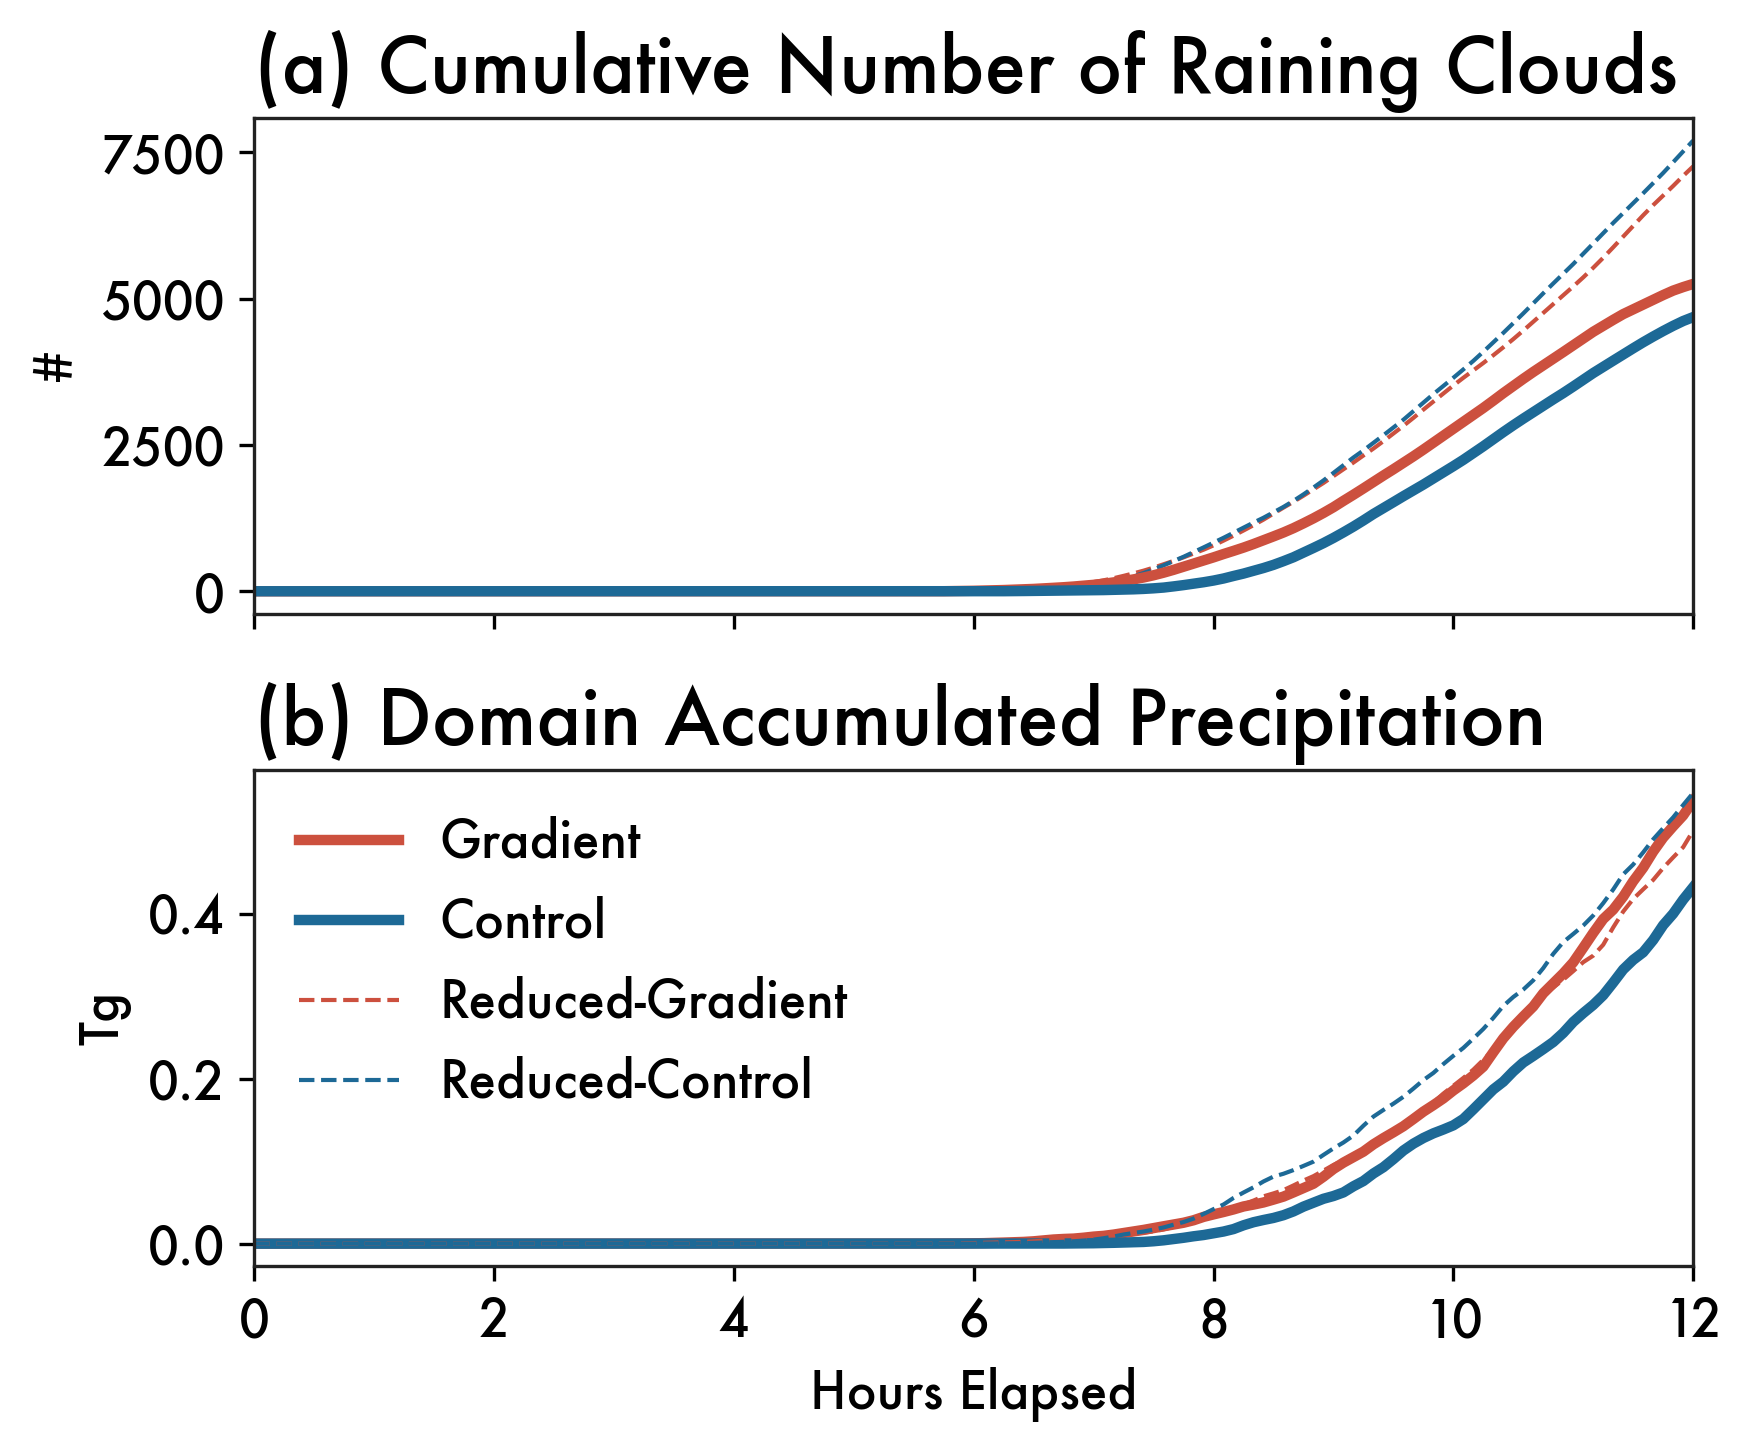

In [8]:
h=12

conc = '1000'

fig, axes = plt.subplots(2,1, figsize=(6,5),sharex=True)

x = (pd.read_pickle(f"{anaPath}grad.{conc}/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.{conc}/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9

print((x.iloc[-1] - y.iloc[-1])/y.iloc[-1])

ax = axes[1]
ax.plot(x.index/12, x, color=red, label='Gradient')
ax.plot(y.index/12, y, color=blue, label='Control')

x = (pd.read_pickle(f"{anaPath}grad.500/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.500/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9


print((x.iloc[-1] - y.iloc[-1])/y.iloc[-1])

ax.plot(x.index/12, x, color=red, label='Reduced-Gradient',ls = '--', lw=1)
ax.plot(y.index/12, y, color=blue, label='Reduced-Control',ls = '--', lw=1)

ax.set_xlim(0,h)

ax = axes[0]
ax.plot(g.index/12, g_low.cumsum(), color=red, ls = '--', lw = 1)
ax.plot(n.index/12, n_low.cumsum(), color=blue, ls = '--', lw = 1)

ax.plot(g.index/12, g.cumsum(), color=red)
ax.plot(n.index/12, n.cumsum(), color=blue)

axes[1].set_ylabel('Tg')
axes[0].set_ylabel('#')

axes[1].set_title(f"(b) Domain Accumulated Precipitation")
axes[0].set_title(f"(a) Cumulative Number of Raining Clouds")

axes[1].set_xlabel('Hours Elapsed')

axes[1].legend()

plt.savefig(f"{figPath}/emit_gradnograd_compare_timeseries-2.png", dpi=300)

(0.0, 12.0)

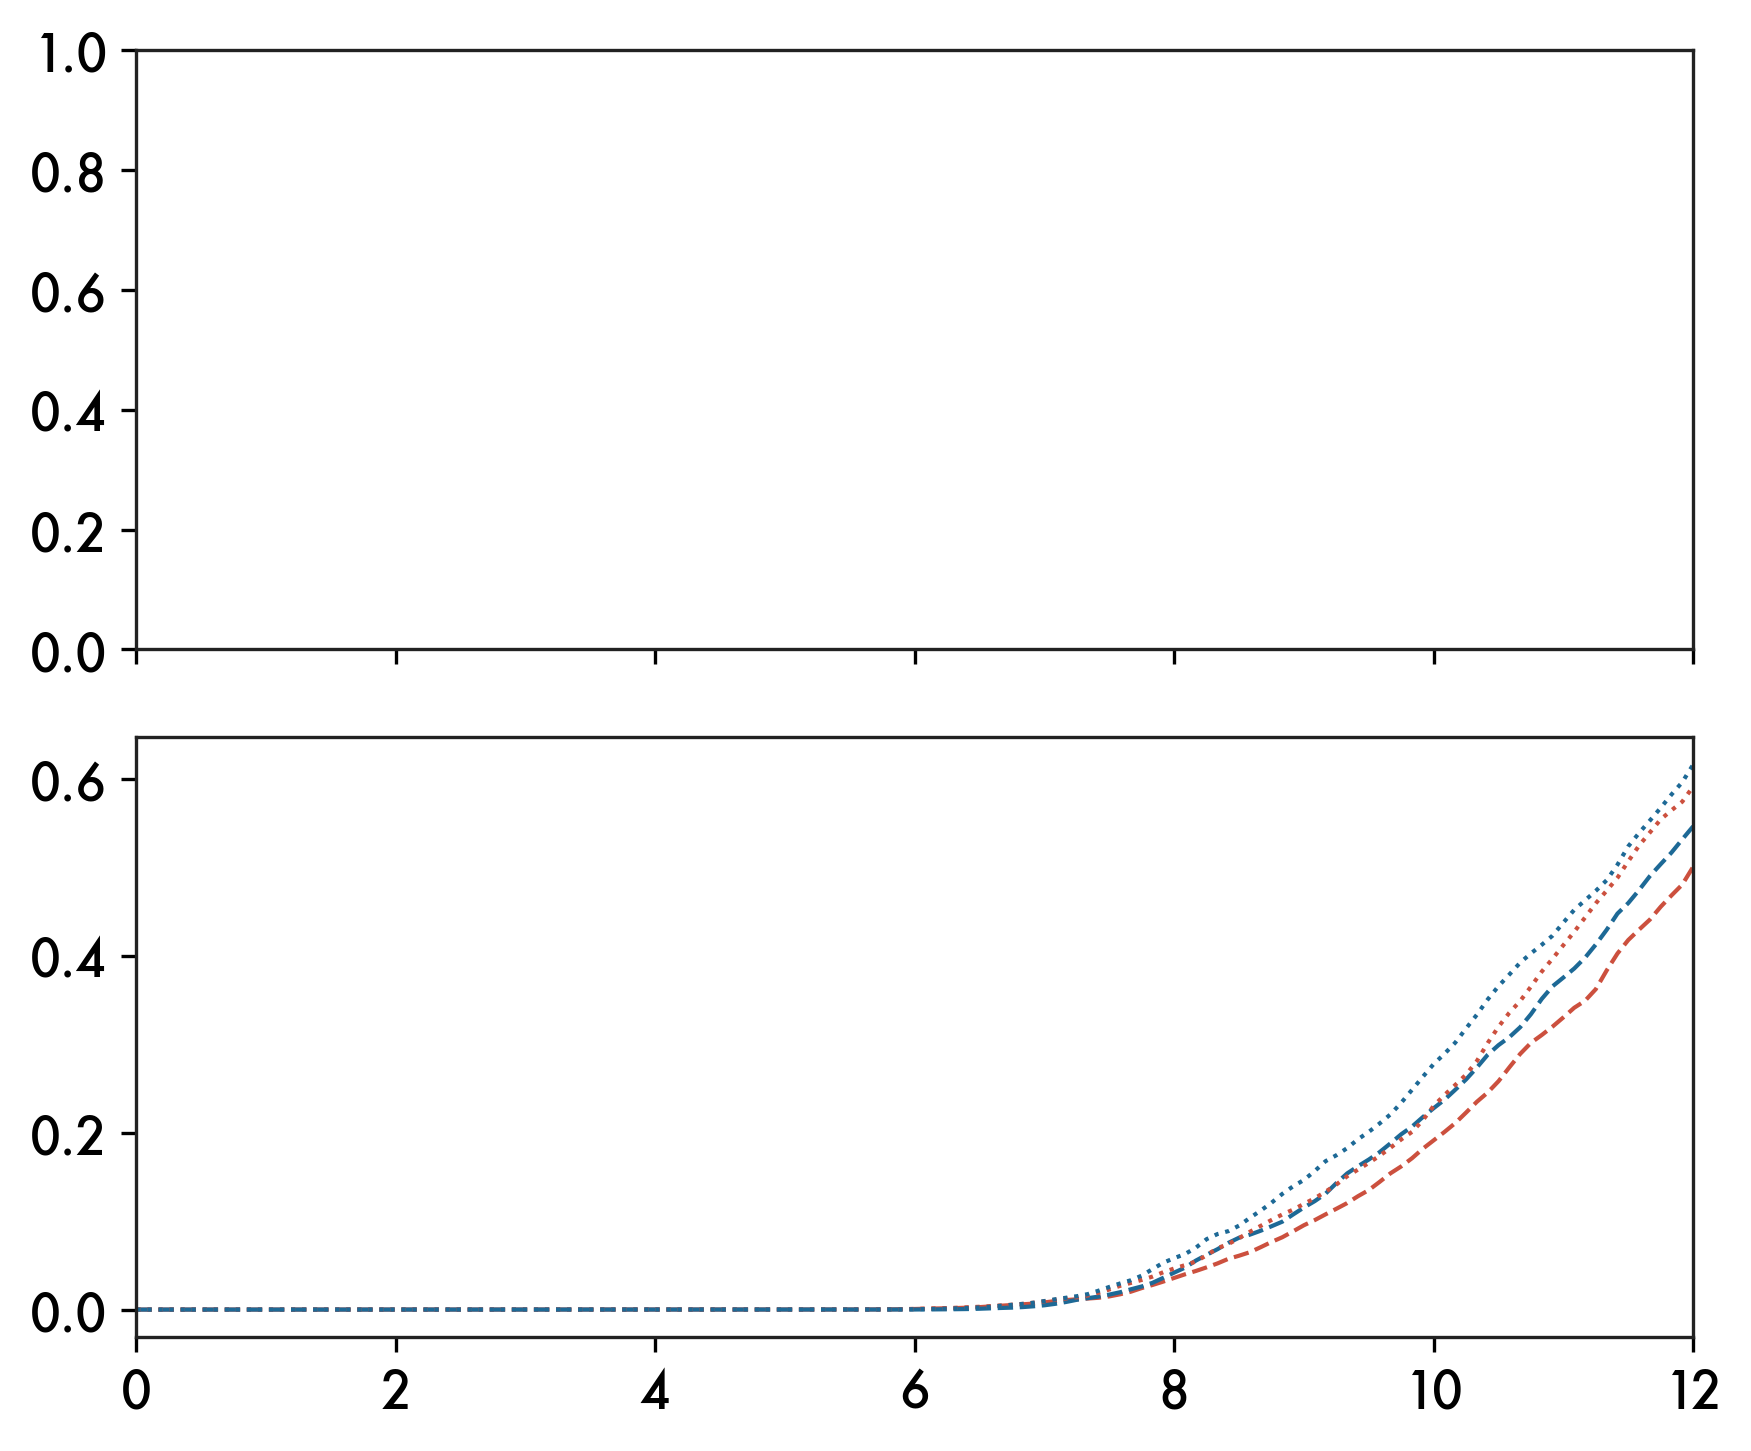

In [6]:
h=12

conc = '1000'

fig, axes = plt.subplots(2,1, figsize=(6,5),sharex=True)

ax = axes[1]


x = (pd.read_pickle(f"{anaPath}grad.1000/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.1000/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9

ax.plot(x.index/12, x, color=red, label='Reduced Gradient',ls = '--', lw=1)
ax.plot(y.index/12, y, color=blue, label='Reduced No Gradient',ls = '--', lw=1)

x = (pd.read_pickle(f"{anaPath}grad.1000.norad/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.1000.norad/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9

ax.plot(x.index/12, x, color=red, label='Reduced Gradient',ls = ':', lw=1)
ax.plot(y.index/12, y, color=blue, label='Reduced No Gradient',ls = ':', lw=1)

ax.set_xlim(0,h)


0.2421958168126793
0.03118235312232111


(0.0, 12.0)

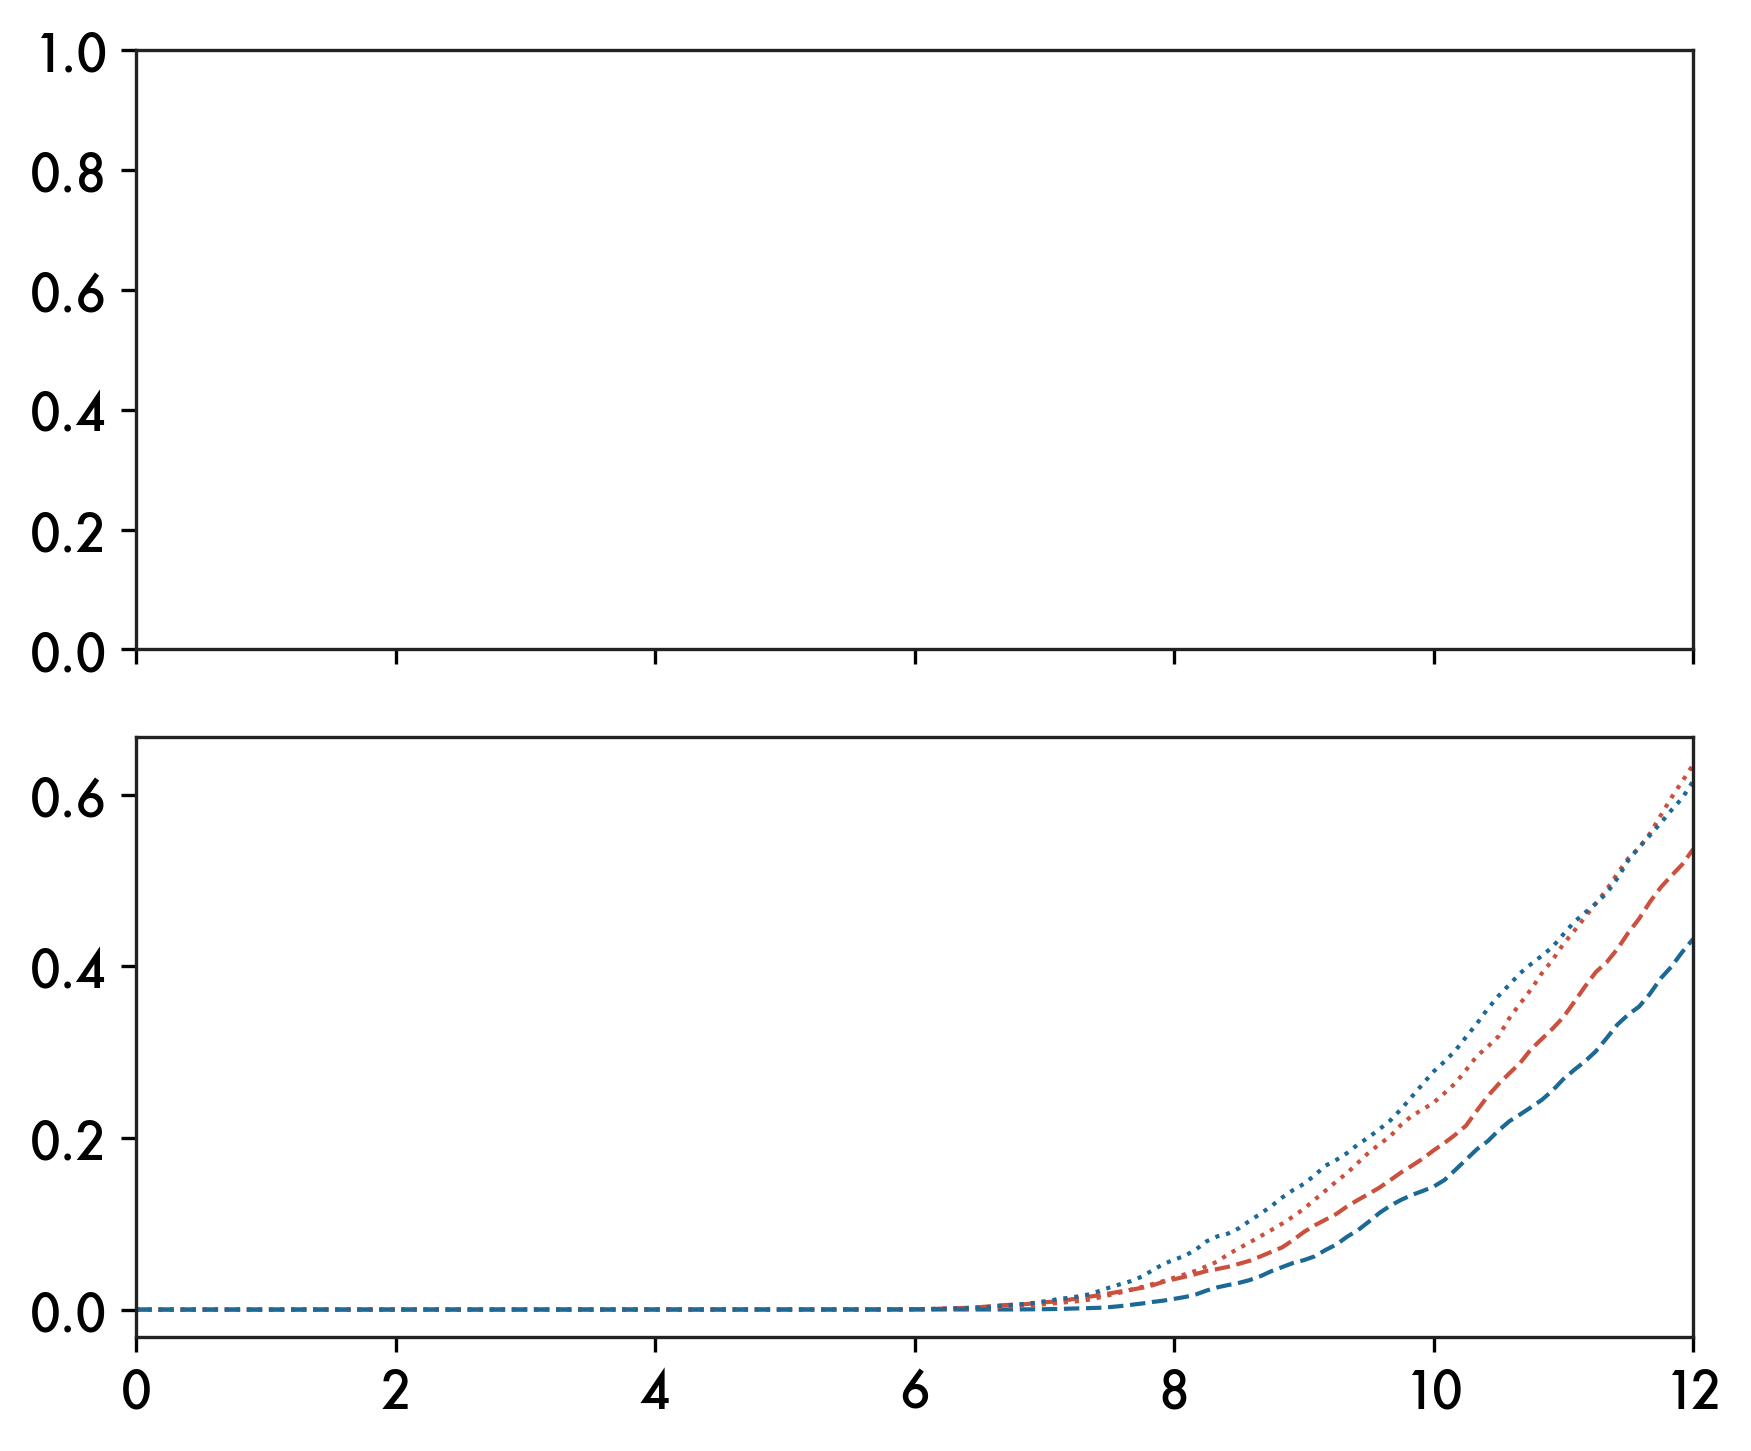

In [8]:
h=12

conc = '1000'

fig, axes = plt.subplots(2,1, figsize=(6,5),sharex=True)

ax = axes[1]


x = (pd.read_pickle(f"{anaPath}grad.1000/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.1000/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9

print((x.iloc[-1]-y.iloc[-1])/y.iloc[-1])
ax.plot(x.index/12, x, color=red, label='Reduced Gradient',ls = '--', lw=1)
ax.plot(y.index/12, y, color=blue, label='Reduced No Gradient',ls = '--', lw=1)

x = (pd.read_pickle(f"{anaPath}grad.1000.norad/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.1000.norad/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9


print((x.iloc[-1]-y.iloc[-1])/y.iloc[-1])
ax.plot(x.index/12, x, color=red, label='Reduced Gradient',ls = ':', lw=1)
ax.plot(y.index/12, y, color=blue, label='Reduced No Gradient',ls = ':', lw=1)

ax.set_xlim(0,h)


In [35]:
print(f"Difference in accumulated precipitation after {h} hours is {(100*(x-y)/y).iloc[-1]:.2f}%")
print(f"Precip onset is {5*(y[y!=0].index[0]-x[x!=0].index[0])} minutes sooner.")

print()

print(f"Difference in accumulated number of tracked updrafts is {(100*((g.cumsum()-n.cumsum())/n.cumsum())).iloc[-1]:.2f}%")
print(f"Updraft onset is {5*(n[n!=0].index[0]-g[g!=0].index[0])} minutes sooner.")

Difference in accumulated precipitation after 12 hours is -8.39%
Precip onset is 40 minutes sooner.

Difference in accumulated number of tracked updrafts is 12.11%
Updraft onset is 30 minutes sooner.


# Mean Cross-Section

In [28]:
print(os.listdir(f"{anaPath}{run}/mean_cross_section"))

['THETA.pkl', 'RCP.pkl', 'TCON.pkl', 'RSP.pkl', 'SWDN.pkl', 'UC.pkl', 'LWUP.pkl', 'WC.pkl', 'RPP.pkl', 'CCCMP.pkl', 'VC.pkl', 'FTHRD.pkl', 'cloud_cover.pkl', 'LWDN.pkl', 'SWUP.pkl']


In [11]:
h = 12
h1  = 0
run = 'grad.1000.nomic'
dx  = 100

wc = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/WC.pkl").reset_index()
uc = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/VC.pkl").reset_index()

wc = wc[wc.time<=h*12 + 1]
uc = uc[uc.time<=h*12 + 1]

'''tcon = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/RCP.pkl").RCP+pd.read_pickle(f"{anaPath}{run}/mean_cross_section/RSP.pkl").RSP+pd.read_pickle(f"{anaPath}{run}/mean_cross_section/RPP.pkl").RPP
tcon.columns = ['TCON']
tcon = tcon.reset_index()
tcon = tcon[tcon.time<=h*12 + 1]'''

print(tcon.time.unique())
swdn = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/SWDN.pkl").reset_index()
swdn = swdn[swdn.time<=h*12 + 1]

swup = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/SWUP.pkl").reset_index()
swup = swup[swup.time<=h*12 + 1]


lwdn = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/LWDN.pkl").reset_index()
lwdn = lwdn[lwdn.time<=h*12 + 1]

lwup = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/LWUP.pkl").reset_index()
lwup = lwup[lwup.time<=h*12 + 1]


fthrd = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/FTHRD.pkl").reset_index()
fthrd = fthrd[fthrd.time<=h*12 + 1]

#data = tcon.copy()
#data['WC'] = wc.WC
data = wc.copy()
data['VC'] = uc.VC
data['y'] = ((data.y+1)*dx)/1000
data['y'] = data.y+0.05
#data = data[(data.y>=50) & (data.y<=9950)]

data.columns = ['time','z','y',
                #'TCON',
                'WC','VC']
data['absx'] = abs(data.y-50)
data.loc[data.y-50<0,'VC'] = -data[data.y-50<0].VC 
data['SWDN'] = swdn.SWDN
data['SWUP'] = swup.SWUP
data['LWDN'] = lwdn.LWDN
data['LWUP'] = lwup.LWUP
data['FTHRD'] = fthrd.FTHRD
data['absx'] = 0.05 * (data.absx//0.05)


data = data[(data.time <= 12*h + 1) & (data.time>12*h1)]
mean = data.groupby(['time','z','absx']).mean()
mean = mean.reset_index()
plot = mean.groupby(['z','absx']).mean().reset_index()

resz = 0.25
resx = 4

winds = plot.copy()
winds['alt'] = (winds.z+1).map(alt/1000)
winds = winds.groupby([resx*round(winds.absx//resx), resz*round(winds.alt//resz)]).mean()[['VC','WC']]
winds = winds.reset_index()

winds = winds[(winds.alt>0) & (winds.alt<=14)]

winds.to_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")
resz = 1
resx = 0.25

plot = plot.reset_index()
plot = plot.groupby([resx*round(plot.absx//resx), 'z']).mean()[[#'TCON',
                                                                'WC',
                                                                'SWDN','SWUP',
                                                                'LWDN','LWUP',
                                                                'FTHRD']]
plot = plot.reset_index()

plot.to_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144]


In [12]:
wind = pd.read_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")

In [13]:
print(f"{anaPath}{run}/mean_wind-{h}.pkl")

/camp2e/gleung/aerograd-analysis/grad.500/mean_wind-12.pkl


In [11]:
print(wind)

     absx    alt        VC        WC
1     0.0   0.25  0.001544 -0.001838
2     0.0   0.50  0.012798 -0.002857
3     0.0   0.75  0.017412 -0.003445
4     0.0   1.00  0.009537 -0.003954
5     0.0   1.25 -0.000532 -0.004154
..    ...    ...       ...       ...
915  48.0  13.00 -0.000167 -0.001346
916  48.0  13.25 -0.000766 -0.001460
917  48.0  13.50 -0.000056 -0.001412
918  48.0  13.75  0.000161 -0.001354
919  48.0  14.00 -0.000096 -0.001289

[715 rows x 4 columns]


In [13]:
run = 'grad.1000.nomic'

aod = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux/AODT.pkl").reset_index()
#pcp = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux/PCPRR.pkl").reset_index()
shf = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux/SFLUX_T.pkl").reset_index() 
lhf = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux/SFLUX_R.pkl").reset_index()

surf = aod.copy()

surf['SHF'] = shf.SFLUX_T * cp
surf['LHF'] = lhf.SFLUX_R * lv
#surf['PCPRR'] = pcp.PCPRR
resx = 0.25

suba = surf[(surf.time>12*h1)&(surf.time<=12*h)]

print(suba.time.max())
print(h)
suba['y'] = (((suba.y+1)*dx)/1000) + 0.05
suba['absx'] = resx * (abs(suba.y - 50) // resx)
#suba['absy'] = abs(suba.y + 1 - 499.5)

suba = suba.groupby('absx').mean()

suba.to_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")

144
12


/tmp/ipykernel_37210/3821513616.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suba['y'] = (((suba.y+1)*dx)/1000) + 0.05
/tmp/ipykernel_37210/3821513616.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suba['absx'] = resx * (abs(suba.y - 50) // resx)


24.0

/tmp/ipykernel_11758/2713452958.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  c = axes[0].contourf(sorted(plot.absx.unique()), alt[1:-1]/1000,


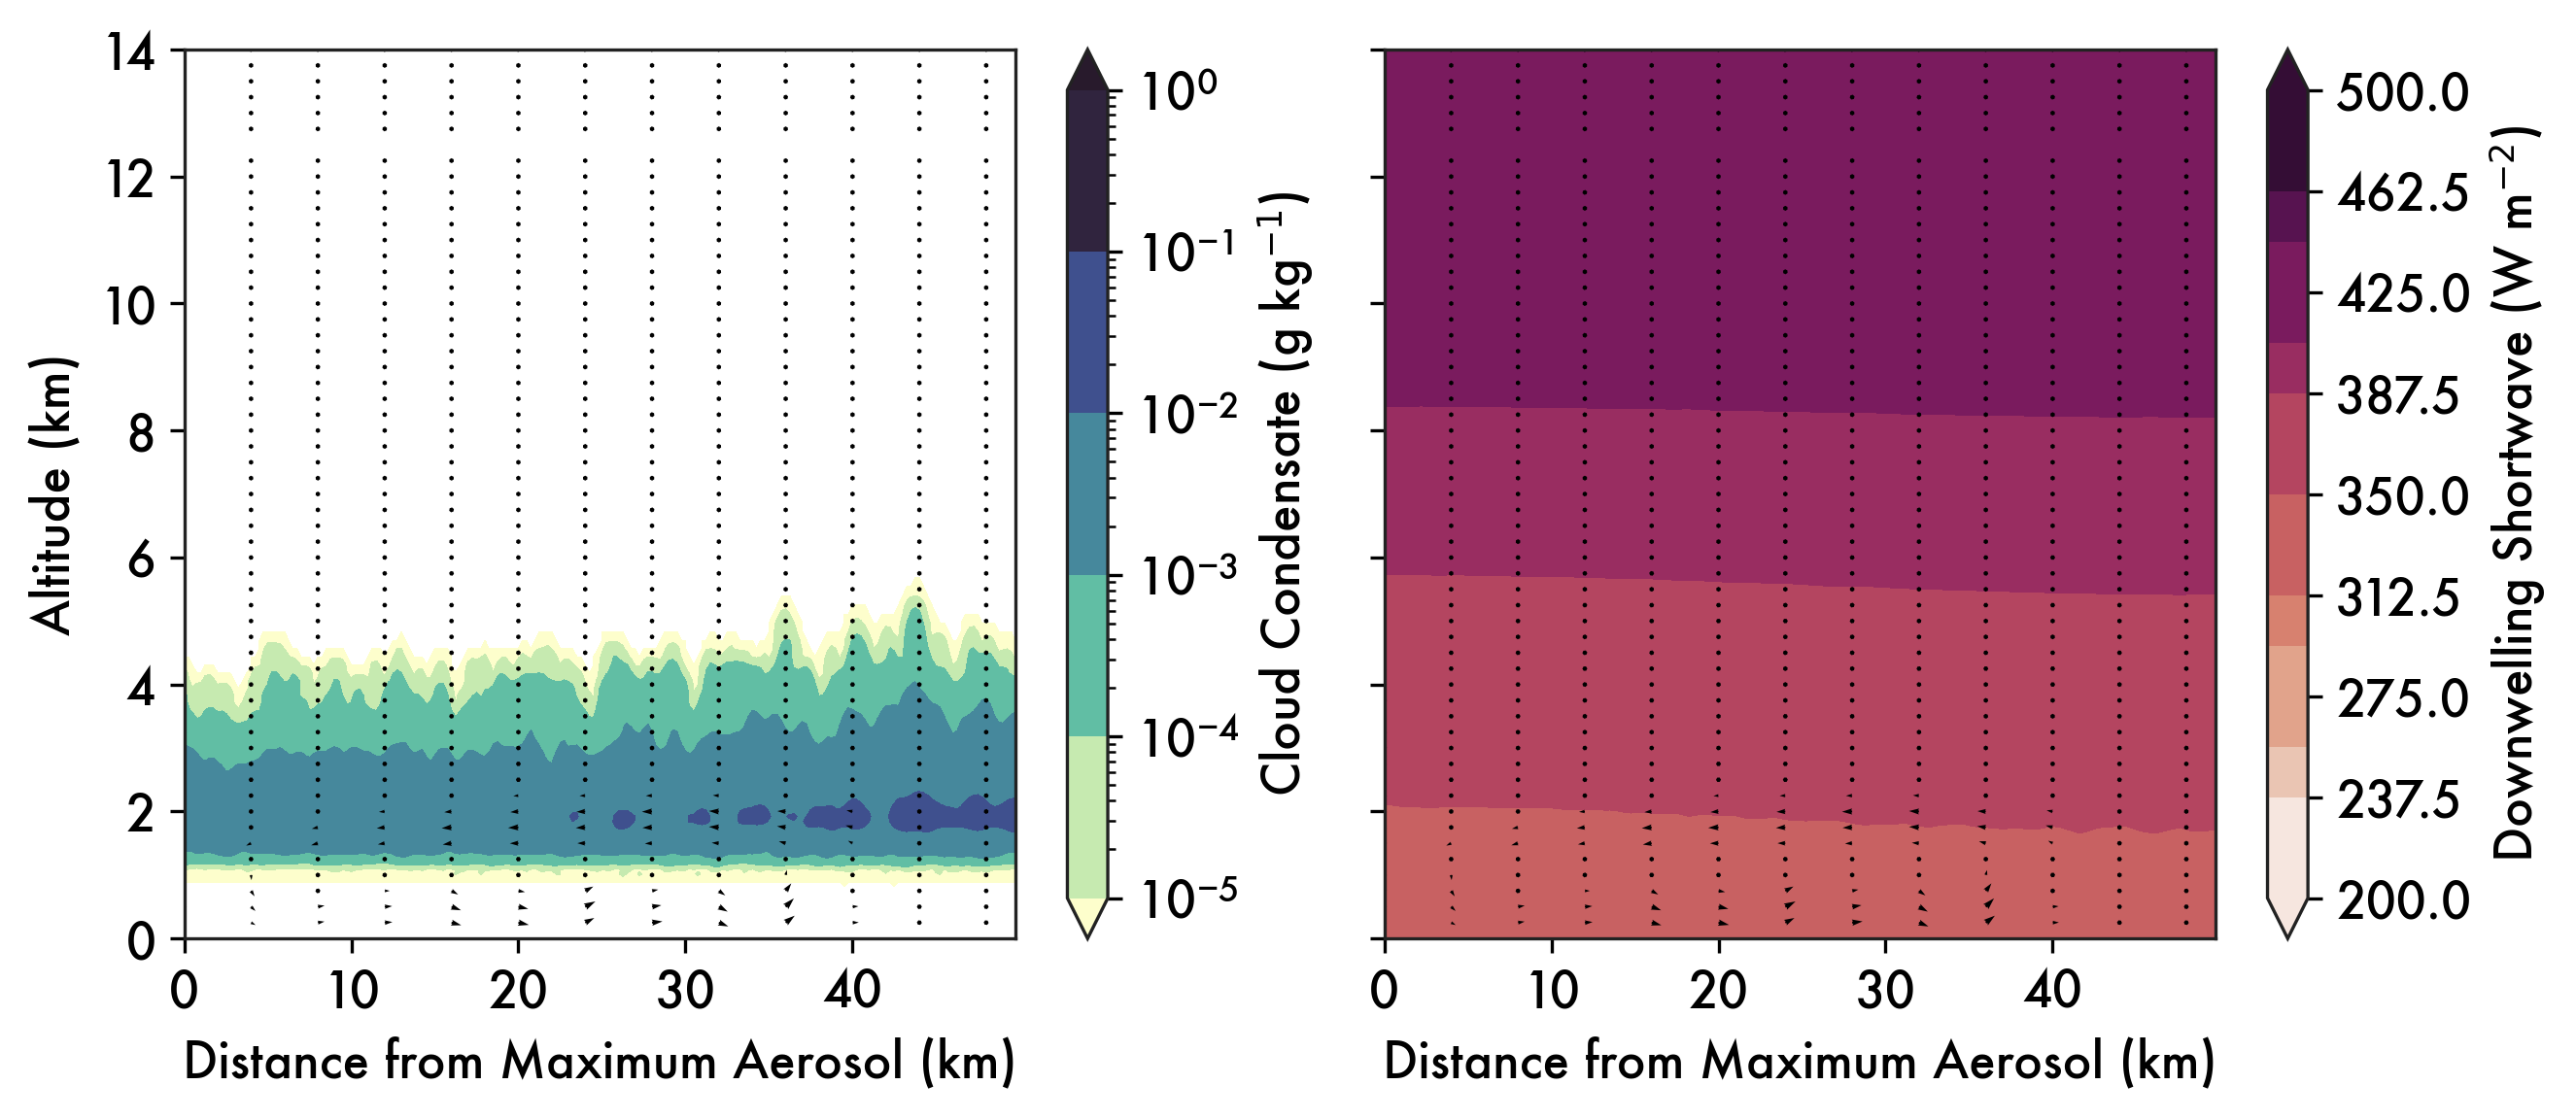

In [47]:
fig, axes = plt.subplots(1,2, figsize=(9,4), sharex=True, sharey=True)

c = axes[0].contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
            plot.pivot(index='z',columns='absx',values='TCON')*1000,
            norm = mcolors.LogNorm(),
            levels = np.logspace(-5,0,6),
            extend='both',
            cmap= deep)

plt.colorbar(c,ax=axes[0],format=mticker.LogFormatterMathtext(),
            label = 'Cloud Condensate (g kg$^{-1}$)')

c = axes[1].contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWDN'),
            levels = np.linspace(200,500,17),
            extend='both',
            cmap=curltop)

plt.colorbar(c,ax=axes[1],
            label = 'Downwelling Shortwave (W m$^{-2}$)')

for ax in axes:
    ax.quiver(winds.absx, winds.alt, 
           winds.VC, winds.WC*5,
         scale = 6, width=6E-3)

    ax.set_xlabel('Distance from Maximum Aerosol (km)')

    ax.set_ylim(0,14)
    #ax.axvline(75)
    
axes[0].set_ylabel('Altitude (km)')

plt.savefig(f"{figPath}{run}/cross_mean.png",dpi=300)

# FIG 1

/tmp/ipykernel_23827/3194331476.py:20: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000,


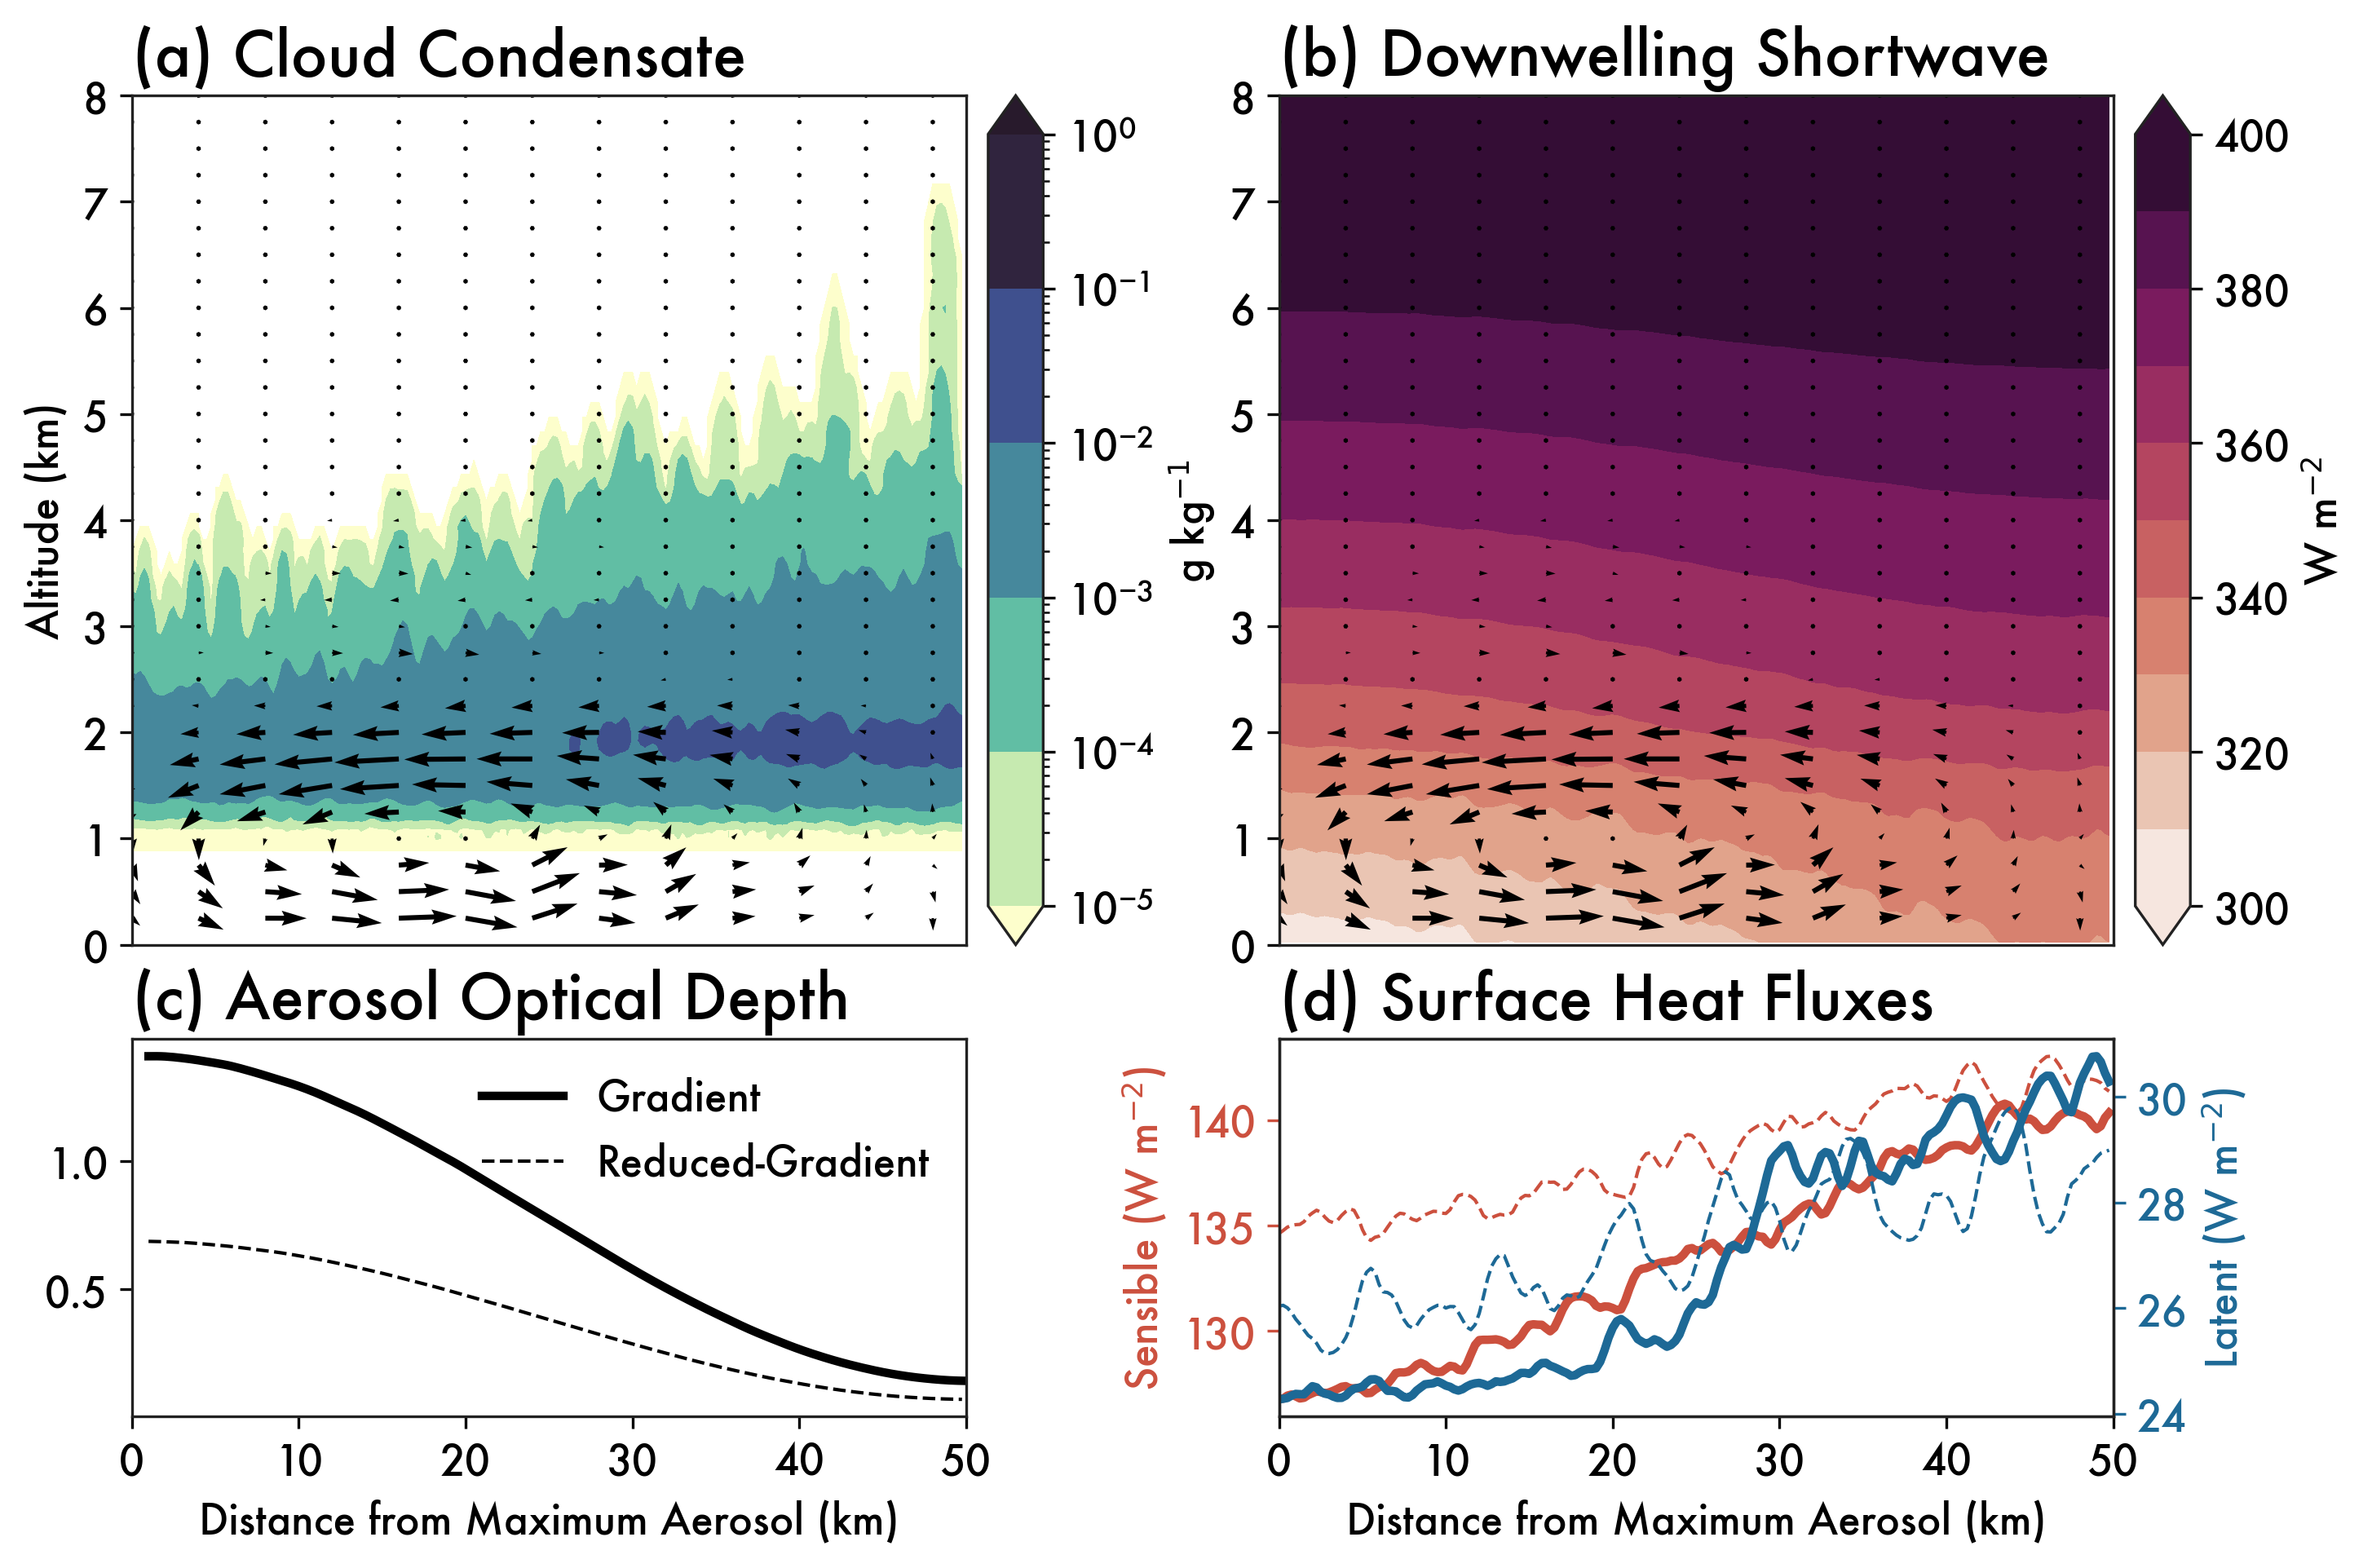

In [8]:
run = 'grad.1000'

h = 12

plot = pd.read_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")
suba = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")
winds = pd.read_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")
suba_low = pd.read_pickle(f"{anaPath}grad.500/mean_surf_flux-{h}.pkl")
fig = plt.figure(figsize=(9,6), constrained_layout=False, tight_layout=False)

spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax1 = fig.add_subplot(spec[0:2, 0])
ax2 = fig.add_subplot(spec[0:2, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(spec[2, 0], sharex=ax1)
ax4 = fig.add_subplot(spec[2, 1], sharex=ax1)

fig.subplots_adjust(wspace=0.375,hspace=0.25)

ax = ax1
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='TCON')*1000,
            norm = mcolors.LogNorm(),
            levels = np.logspace(-5,0,6),
            extend='both',
            cmap= deep)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax, format=mticker.LogFormatterMathtext(),
            label = 'g kg$^{-1}$')

ax = ax2
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWDN'),
            levels = np.linspace(300,400,11),
            extend='both',
            cmap=curltop)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'W m$^{-2}$')

for ax in [ax1,ax2]:
    ax.quiver(winds.absx, winds.alt, 
           winds.VC, winds.WC*5,
         scale = 3, width=6E-3)

    ax.set_ylim(0,8)
    
ax1.set_ylabel('Altitude (km)')

ax3.plot(suba.index, suba.AODT.rolling(5).mean(),color='black',
        label = 'Gradient')
ax3.plot(suba_low.index, suba_low.AODT.rolling(5).mean(),color='black',ls='--',lw=1,
        label = 'Reduced-Gradient')

ax3.legend()


ax4.plot(suba.index, suba.SHF, color=red)
ax4.plot(suba_low.index, suba_low.SHF, color=red, ls = '--', lw=1)
ax4b = ax4.twinx()
ax4b.plot(suba.index, suba.LHF, color=blue)
ax4b.plot(suba_low.index, suba_low.LHF, color=blue, ls = '--',lw=1)

ax4.set_ylabel('Sensible (W m$^{{-2}}$)')
ax4b.set_ylabel('Latent (W m$^{{-2}}$)')

ax4.yaxis.label.set_color(red)
ax4.tick_params(axis='y', colors=red)
ax4b.yaxis.label.set_color(blue)
ax4b.tick_params(axis='y', colors=blue)

for ax in [ax3,ax4]:
    ax.set_xlabel('Distance from Maximum Aerosol (km)')

ax1.set_xlim(0,50)

ax1.set_title("(a) Cloud Condensate")
ax2.set_title("(b) Downwelling Shortwave")
ax3.set_title("(c) Aerosol Optical Depth")
ax4.set_title("(d) Surface Heat Fluxes")

plt.savefig(f"{figPath}/{run}/cross_full_mean-{h}.png",
            dpi=300,bbox_inches='tight')

In [42]:
plot['SWNET'] = plot.SWDN - plot.SWUP

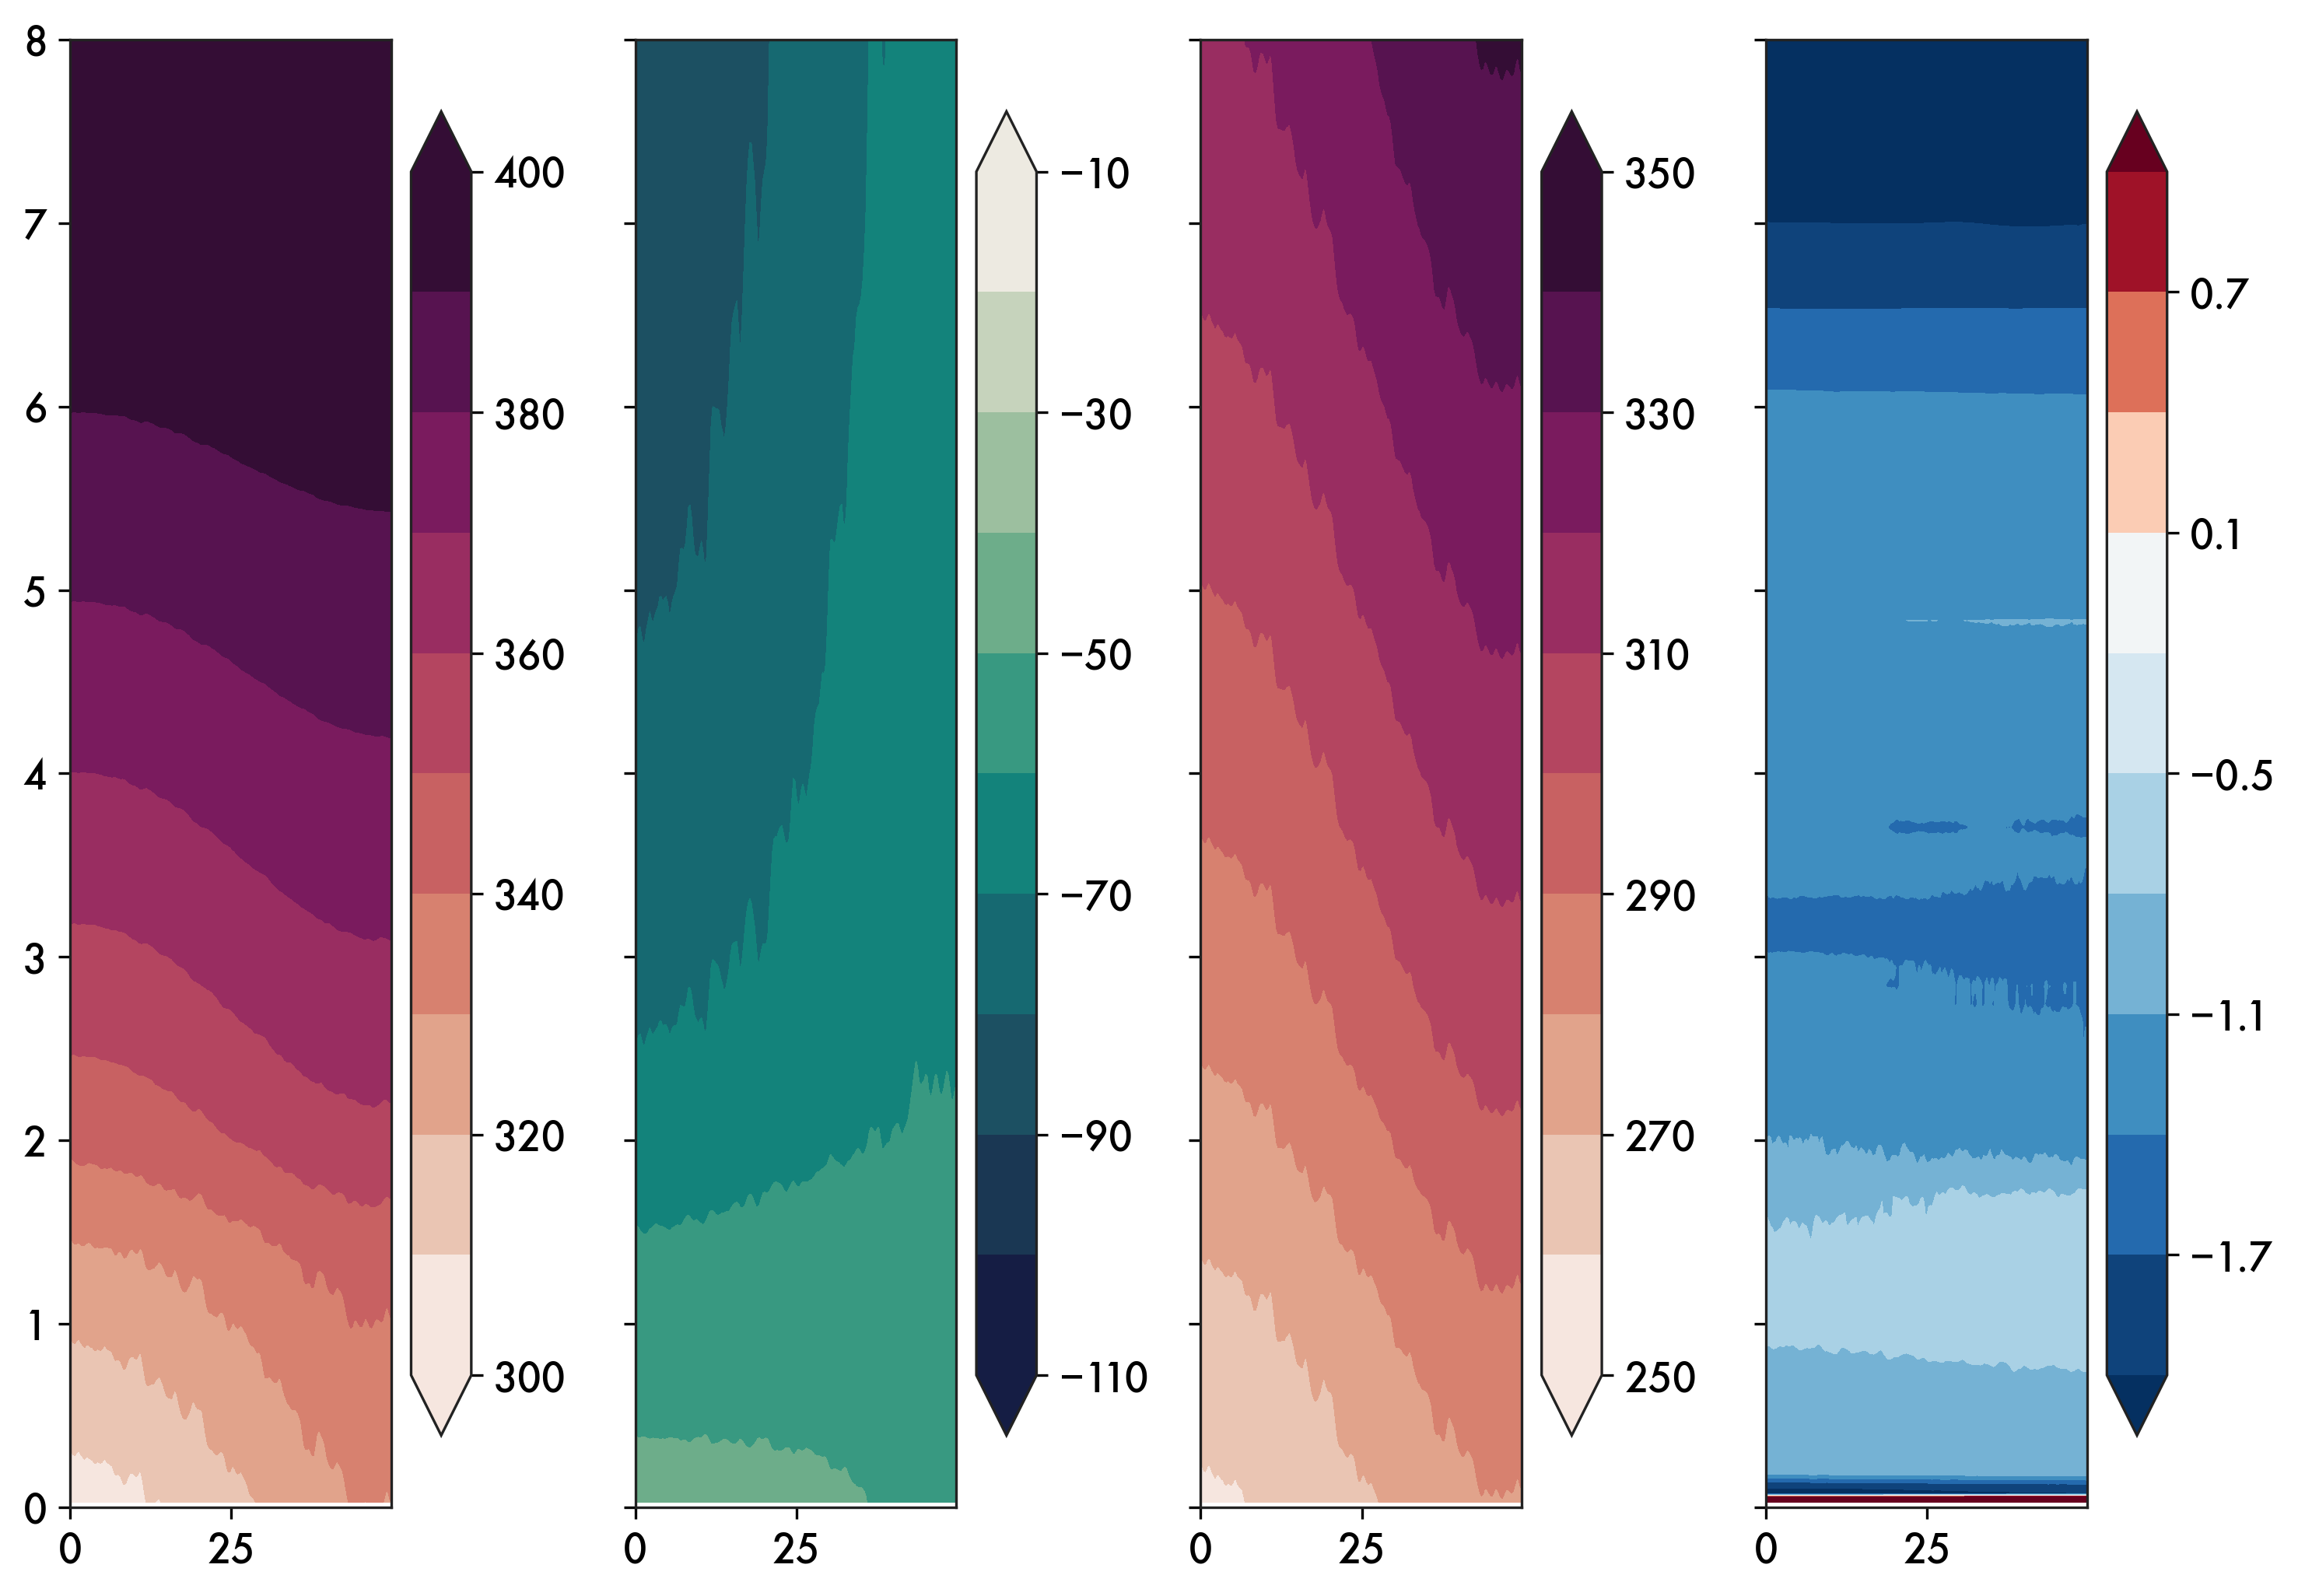

In [43]:
fig, axes = plt.subplots(1,4,sharex=True,sharey=True)

c = axes[0].contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWDN'),
            levels = np.linspace(300,400,11),
            extend='both',
            cmap=curltop)
plt.colorbar(c,ax=axes[0])

c = axes[1].contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             -plot.pivot(index='z',columns='absx',values='SWUP'),
            levels = np.linspace(-110,-10,11),
            extend='both',
            cmap=curlbot)
plt.colorbar(c,ax=axes[1])


c = axes[2].contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWNET'),
            levels = np.linspace(250,350,11),
            extend='both',
            cmap=curltop)
plt.colorbar(c,ax=axes[2])

c = axes[3].contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='FTHRD')*3600*24,
            levels = np.linspace(-2,1,11),
            extend='both',
            cmap='RdBu_r',
            norm = mcolors.TwoSlopeNorm(vcenter=0))
plt.colorbar(c,ax=axes[3])

for ax in axes:
    ax.set_ylim(0,8)

In [9]:
# Difference in downwelling shortwave at the surface 

print(100*(plot[(plot.absx>=40) & (plot.z==0)].SWDN.mean() - plot[(plot.absx<=10) & (plot.z==0)].SWDN.mean())/plot[(plot.absx<=10) & (plot.z==0)].SWDN.mean()) 
print(100*(suba[(suba.index>=40)].mean()-suba[(suba.index<=10)].mean())/suba[(suba.index<=10)].mean())

3.802204830658713
time      0.000000
y         0.000000
AODT    -86.054058
SHF       4.967368
LHF      13.489514
PCPRR    67.763672
dtype: float64


In [28]:
# Difference in downwelling shortwave at the surface 

print(100*(plot[(plot.absx>=40) & (plot.z==0)].SWDN.mean() - plot[(plot.absx<=10) & (plot.z==0)].SWDN.mean())/plot[(plot.absx<=10) & (plot.z==0)].SWDN.mean()) 

3.842593822297813


In [29]:
print(100*(suba[(suba.index>=40)].mean()-suba[(suba.index<=10)].mean())/suba[(suba.index<=10)].mean())

time       0.000000
y          0.000000
AODT     -86.222732
SHF        4.811442
LHF       10.201238
PCPRR    291.277256
dtype: float64


/tmp/ipykernel_15176/2200621337.py:20: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000,


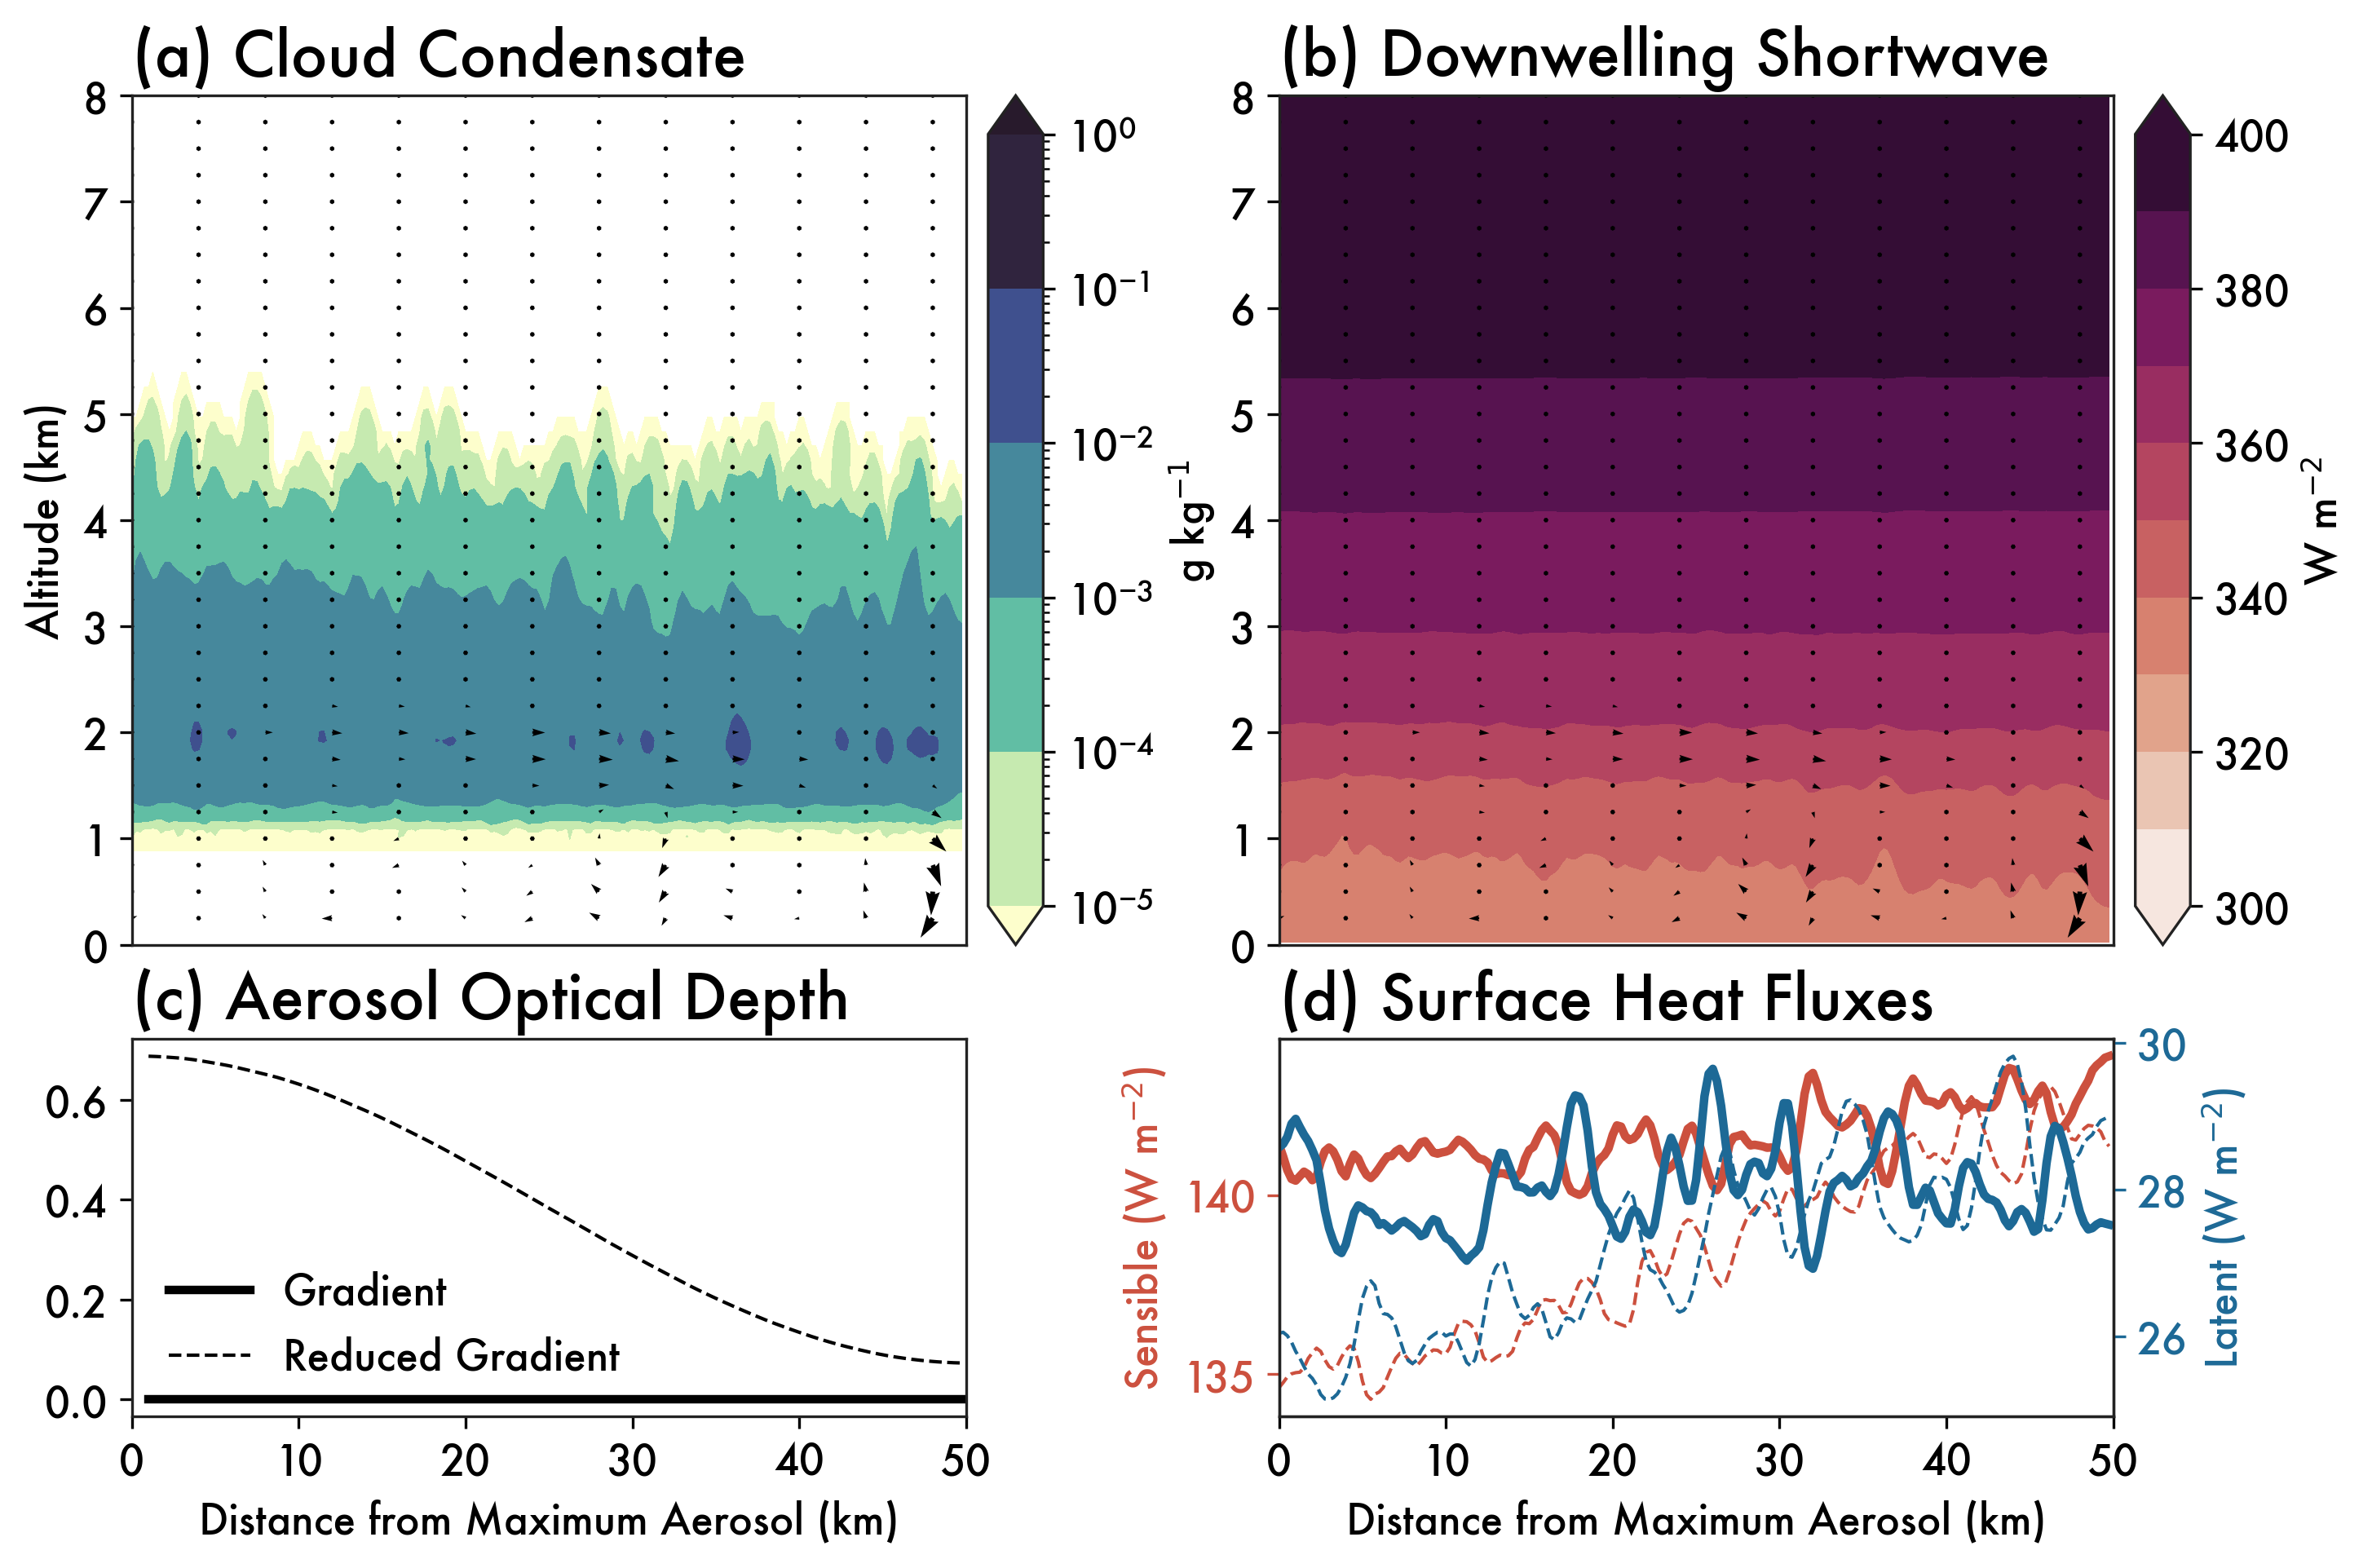

In [13]:
run = 'grad.1000.norad'

h = 12

plot = pd.read_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")
suba = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")
winds = pd.read_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")
suba_low = pd.read_pickle(f"{anaPath}grad.500/mean_surf_flux-{h}.pkl")
fig = plt.figure(figsize=(9,6), constrained_layout=False, tight_layout=False)

spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax1 = fig.add_subplot(spec[0:2, 0])
ax2 = fig.add_subplot(spec[0:2, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(spec[2, 0], sharex=ax1)
ax4 = fig.add_subplot(spec[2, 1], sharex=ax1)

fig.subplots_adjust(wspace=0.375,hspace=0.25)

ax = ax1
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='TCON')*1000,
            norm = mcolors.LogNorm(),
            levels = np.logspace(-5,0,6),
            extend='both',
            cmap= deep)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax, format=mticker.LogFormatterMathtext(),
            label = 'g kg$^{-1}$')

ax = ax2
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWDN'),
            levels = np.linspace(300,400,11),
            extend='both',
            cmap=curltop)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'W m$^{-2}$')

for ax in [ax1,ax2]:
    ax.quiver(winds.absx, winds.alt, 
           winds.VC, winds.WC*5,
         scale = 3, width=6E-3)

    ax.set_ylim(0,8)
    
ax1.set_ylabel('Altitude (km)')

ax3.plot(suba.index, suba.AODT.rolling(5).mean(),color='black',
        label = 'Gradient')
ax3.plot(suba_low.index, suba_low.AODT.rolling(5).mean(),color='black',ls='--',lw=1,
        label = 'Reduced Gradient')

ax3.legend()


ax4.plot(suba.index, suba.SHF, color=red)
ax4.plot(suba_low.index, suba_low.SHF, color=red, ls = '--', lw=1)
ax4b = ax4.twinx()
ax4b.plot(suba.index, suba.LHF, color=blue)
ax4b.plot(suba_low.index, suba_low.LHF, color=blue, ls = '--',lw=1)

ax4.set_ylabel('Sensible (W m$^{{-2}}$)')
ax4b.set_ylabel('Latent (W m$^{{-2}}$)')

ax4.yaxis.label.set_color(red)
ax4.tick_params(axis='y', colors=red)
ax4b.yaxis.label.set_color(blue)
ax4b.tick_params(axis='y', colors=blue)

for ax in [ax3,ax4]:
    ax.set_xlabel('Distance from Maximum Aerosol (km)')

ax1.set_xlim(0,50)

ax1.set_title("(a) Cloud Condensate")
ax2.set_title("(b) Downwelling Shortwave")
ax3.set_title("(c) Aerosol Optical Depth")
ax4.set_title("(d) Surface Heat Fluxes")

plt.savefig(f"{figPath}/{run}/cross_full_mean-{h}.png",
            dpi=300,bbox_inches='tight')

# Comparisons x-dimension

FileNotFoundError: File /camp2e/gleung/aerograd-analysis/nograd/tobac-out/w_features_track.h5 does not exist

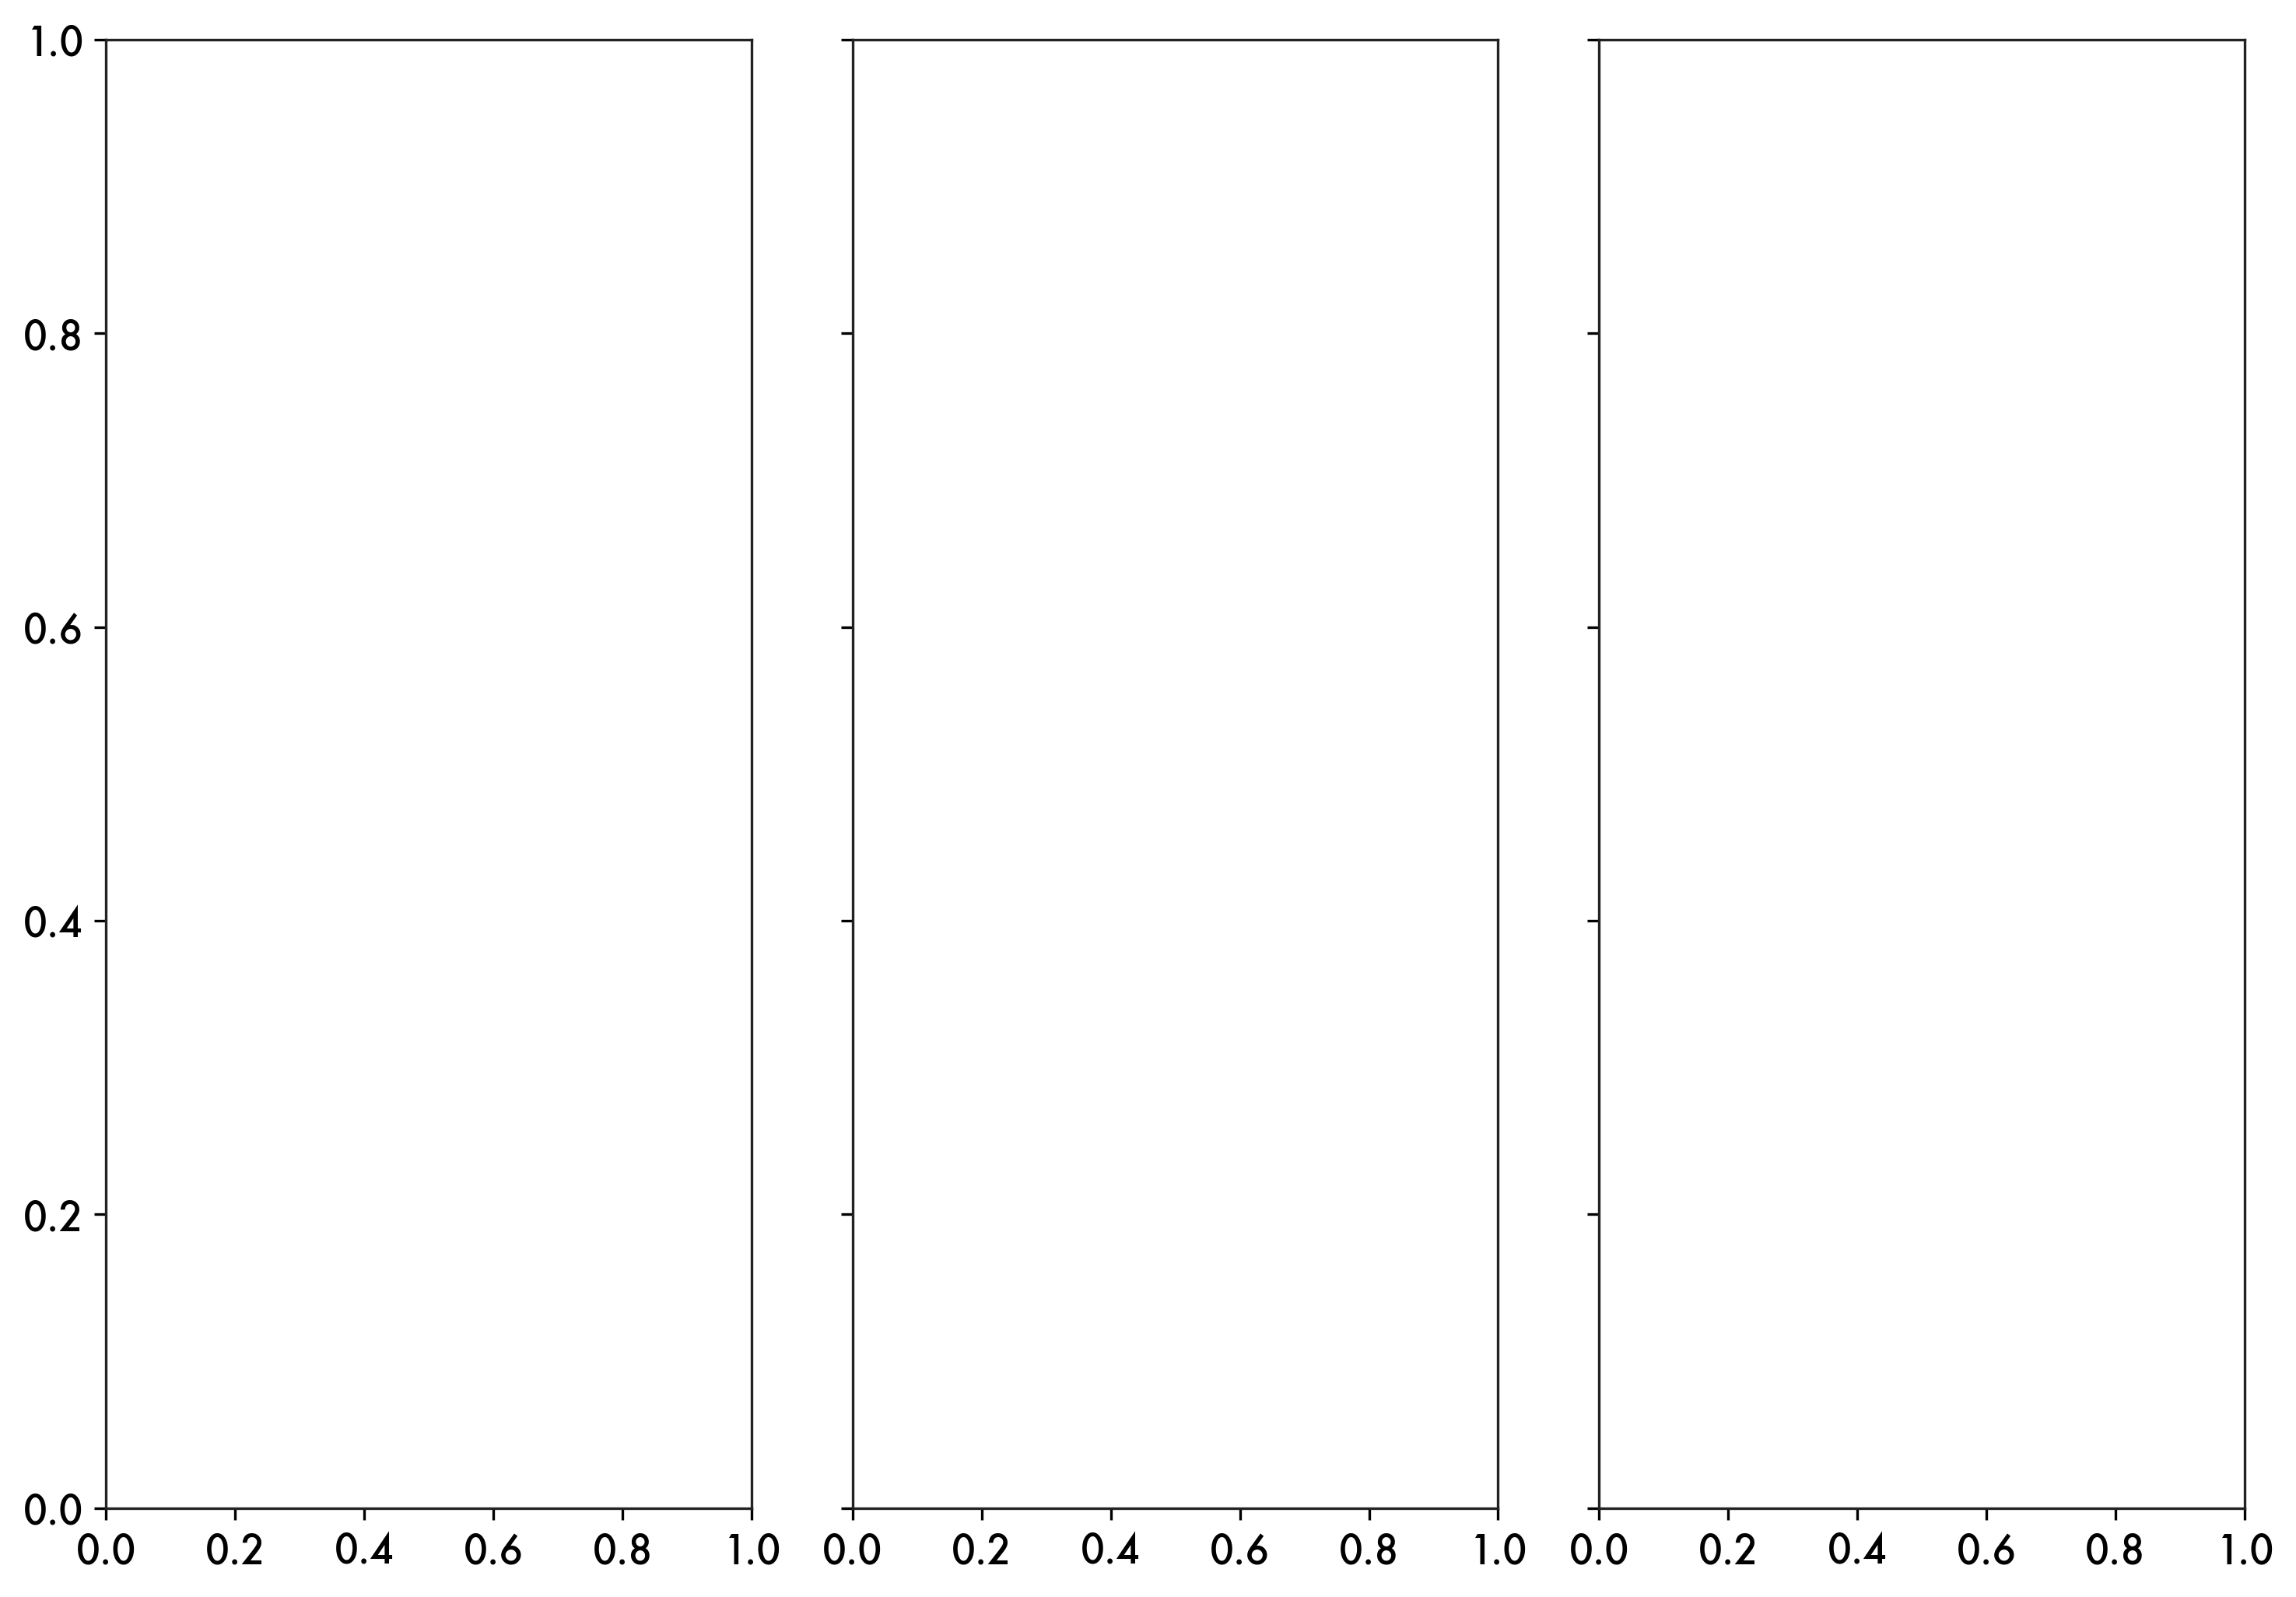

In [5]:
resx = 5
h = 12
bins = np.arange(0,50+resx,resx)

fig, axes = plt.subplots(1,3, sharey=True)
run  = 'nograd'
df = pd.read_hdf(f"{anaPath}{run}/tobac-out/w_features_track.h5", 'table')
df = df[df.frame<=12*h + 1]
df = df[df.lifetime>dt.timedelta(minutes=5)]
#df = df.groupby('cell').mean()

axes[0].hist(df[df.threshold_value==1].altitude, bins = alt[:70:3], 
         color=red,histtype='step', orientation='horizontal')
axes[1].hist(df[df.threshold_value==3].altitude, bins = alt[:70:3], 
         color=red,histtype='step', orientation='horizontal')
axes[2].hist(df[df.threshold_value==5].altitude, bins = alt[:70:3], 
         color=red,histtype='step', orientation='horizontal')

'''df = df[df.altitude>1500]
df = df[df.threshold_value>=3]
df['absx'] = resx * (abs(((df.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
nograd = pd.Series(np.histogram(df.absx, bins = bins)[0])
nograd.index = (bins[1:]+bins[:-1])/2'''

#plt.plot(nograd,color=red)

run  = 'grad'
df = pd.read_hdf(f"{anaPath}{run}/tobac-out/w_features_track.h5", 'table')
df = df[df.frame<=12*h + 1]
df = df[df.lifetime>dt.timedelta(minutes=5)]
#df = df.groupby('cell').mean()
axes[0].hist(df[df.threshold_value==1].altitude, bins = alt[:70:3], 
         color=blue,histtype='step', orientation='horizontal')
axes[1].hist(df[df.threshold_value==3].altitude, bins = alt[:70:3], 
         color=blue,histtype='step', orientation='horizontal')
axes[2].hist(df[df.threshold_value==5].altitude, bins = alt[:70:3], 
         color=blue,histtype='step', orientation='horizontal')
'''df = df[df.altitude>1500]
df = df[df.threshold_value>=3]
df['absx'] = resx * (abs(((df.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx)
grad = pd.Series(np.histogram(df.absx, bins = bins)[0])
grad.index = (bins[1:]+bins[:-1])/2'''

#plt.plot(grad,color=blue)

print(nograd.sum(),grad.sum())

print(100*(grad.sum()-nograd.sum())/nograd.sum())

print(100*(67704-66281)/66281)

In [7]:
resx = 5
h = 12
bins = np.arange(0,50+resx,resx)

g = pd.read_hdf(f"{anaPath}grad.1000/tobac-out/w_features_track.h5",'table')
g['sum_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.1000/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
g['mean_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.1000/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
g['maxcell_pcprr'] = g.cell.map(g.groupby('cell').mean_pcprr.mean())
g = g[g.maxcell_pcprr*3600>0.1]
g = g[g.lifetime>dt.timedelta(minutes=5)]
g['absx'] = resx * (abs(((g.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
grad = pd.Series(np.histogram(g.absx, bins = bins)[0])
grad.index = (bins[1:]+bins[:-1])/2

n = pd.read_hdf(f"{anaPath}nograd.1000/tobac-out/w_features_track.h5",'table')
print(n.shape)
n['sum_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.1000/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
n['mean_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.1000/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
n['maxcell_pcprr'] = n.cell.map(n.groupby('cell').mean_pcprr.mean())
n = n[n.maxcell_pcprr*3600>0.1]
n = n[n.lifetime>dt.timedelta(minutes=5)]
n['absx'] = resx * (abs(((n.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
nograd = pd.Series(np.histogram(n.absx, bins = bins)[0])
nograd.index = (bins[1:]+bins[:-1])/2
print(nograd.sum(),grad.sum())

print(100*(grad.sum()-nograd.sum())/nograd.sum())

nograd_high = nograd.copy()
grad_high = grad.copy()

(72427, 19)
4684 5251
12.105038428693424


In [8]:
resx = 5
h = 12
bins = np.arange(0,50+resx,resx)
conc = 500

g = pd.read_hdf(f"{anaPath}grad.{conc}/tobac-out/w_features_track.h5",'table')
g = g[g.frame<=144]
g['sum_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
g['mean_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
g['maxcell_pcprr'] = g.cell.map(g.groupby('cell').mean_pcprr.mean())
g = g[g.maxcell_pcprr*3600>0.1]
g = g[g.lifetime>dt.timedelta(minutes=5)]
g['absx'] = resx * (abs(((g.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
grad = pd.Series(np.histogram(g.absx, bins = bins)[0]).copy()
grad.index = (bins[1:]+bins[:-1])/2

n = pd.read_hdf(f"{anaPath}nograd.{conc}/tobac-out/w_features_track.h5",'table')
n = n[n.frame<=144]
n['sum_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
n['mean_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
n['maxcell_pcprr'] = n.cell.map(n.groupby('cell').mean_pcprr.mean())
n = n[n.maxcell_pcprr*3600>0.1]
n = n[n.lifetime>dt.timedelta(minutes=5)]
n['absx'] = resx * (abs(((n.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
nograd = pd.Series(np.histogram(n.absx, bins = bins)[0]).copy()
nograd.index = (bins[1:]+bins[:-1])/2
print(nograd.sum(),grad.sum())

print(100*(grad.sum()-nograd.sum())/nograd.sum())

6726 6144
-8.652988403211419


In [9]:
conc = '1000.norad'

h = 12
resx = 0.5
run  = f'nograd.{conc}'
ccn = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/CCCMP.pkl")
ccn = ccn[(ccn.index.get_level_values(1)==0)].reset_index()
ccn = ccn[ccn.time<=12*h+1]
ccn['absy'] = resx* (abs(((ccn.y + 1) * dx/1000)+0.05 - 50) // resx)

run  = f'grad.{conc}'
ccng = pd.read_pickle(f"{anaPath}{run}/mean_cross_section/CCCMP.pkl")
ccng = ccng[(ccng.index.get_level_values(1)==0)].reset_index()
ccng = ccng[ccng.time<=12*h+1]
ccng['absy'] = resx * (abs(((ccng.y + 1) * dx/1000)+0.05 - 50) // resx)

ccn = ccn.groupby('absy').mean() 
ccng = ccng.groupby('absy').mean() 

ccn.to_pickle(f"{anaPath}{run}/CCNsurf-nograd.pkl")
ccng.to_pickle(f"{anaPath}{run}/CCNsurf-grad.pkl")

In [10]:
h = 12
resx = 0.5
run  = f'nograd.{conc}'
pcp = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux/ACCPR.pkl").reset_index()
pcp = pcp[pcp.time<=12*h+1]
pcp['absy'] = resx * (abs(((pcp.y + 1) * dx/1000)+0.05 - 50) // resx)

run  = f'grad.{conc}'
pcpg = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux/ACCPR.pkl").reset_index()
pcpg = pcpg[pcpg.time<=12*h+1]
pcpg['absy'] = resx * (abs(((pcpg.y + 1) * dx/1000)+0.05 - 50) // resx)

pcp = pcp.groupby('absy').ACCPR.mean()
pcpg = pcpg.groupby('absy').ACCPR.mean()

pcp.to_pickle(f"{anaPath}{run}/PCPsurf-nograd.pkl")
pcpg.to_pickle(f"{anaPath}{run}/PCPsurf-grad.pkl")

# FIG 2

No handles with labels found to put in legend.


6726 6144
pcp-solid 0.5855768965859949 0.7792126949426024
pcp 0.9006038824197006 0.7903459552511337
1.1159177789820463e-06 1.1650391334515774e-06
grad.1000


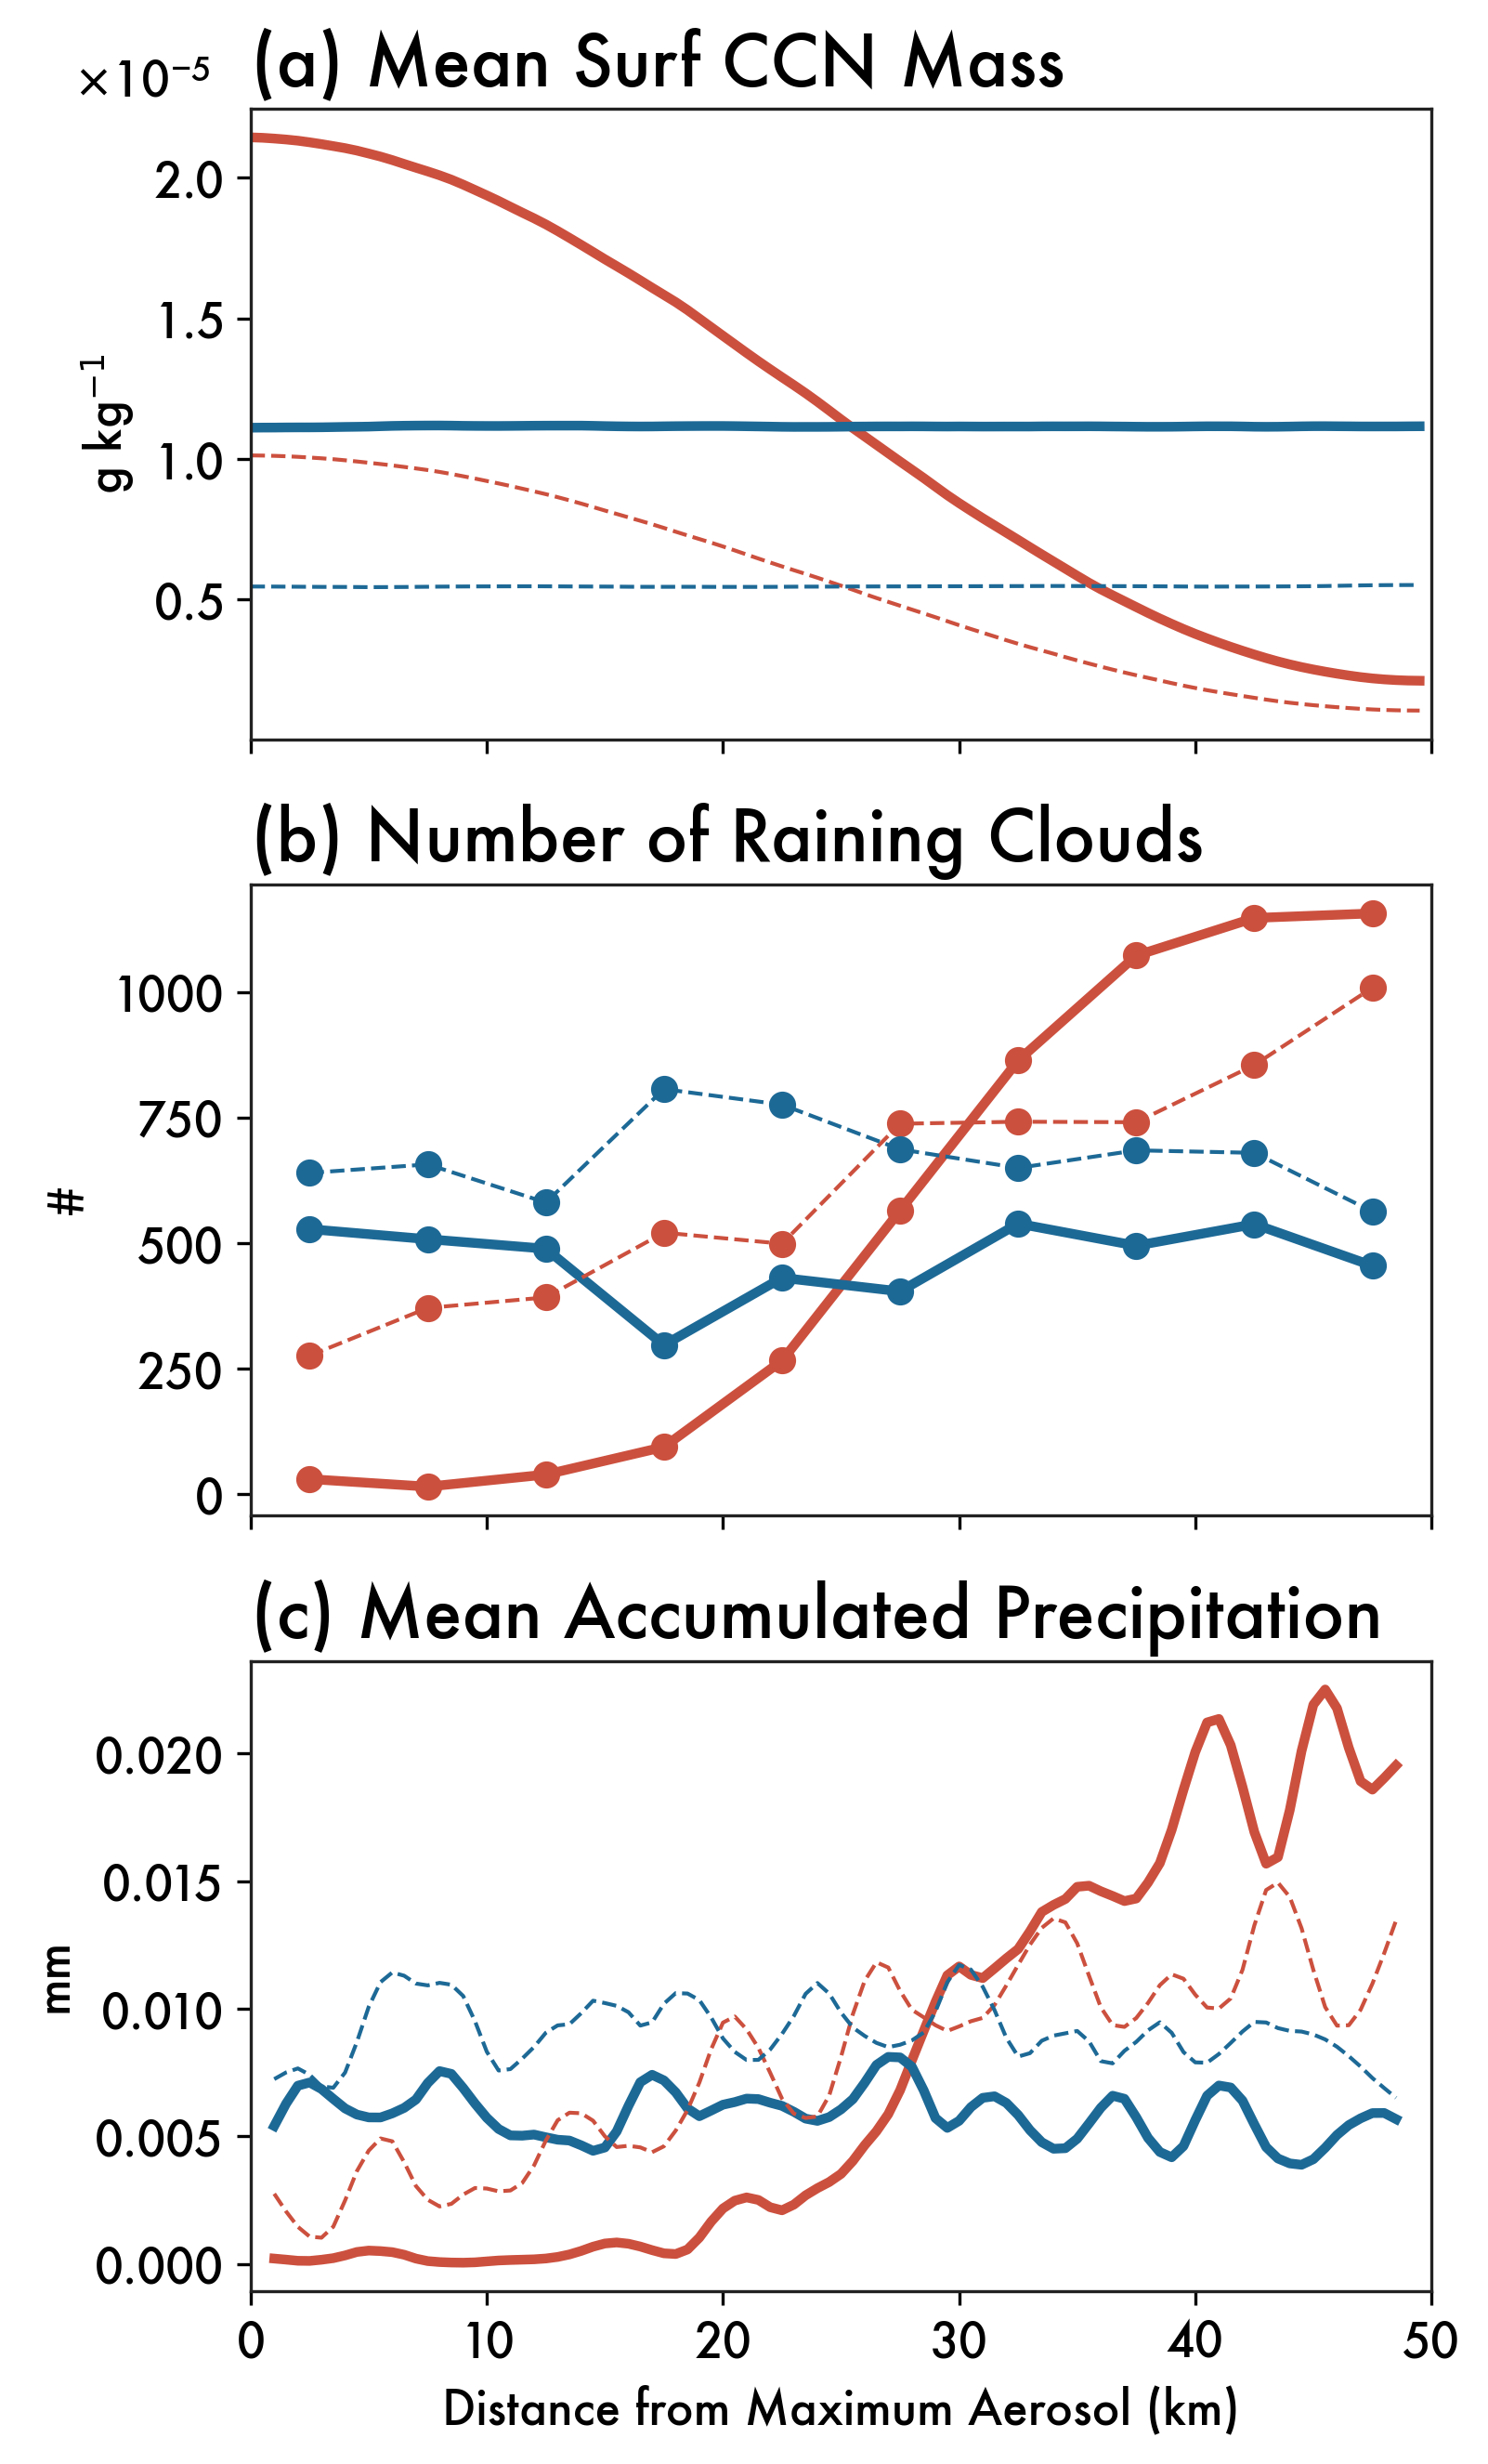

In [11]:
run = 'grad.1000'

ccn = pd.read_pickle(f"{anaPath}{run}/CCNsurf-nograd.pkl")
ccng = pd.read_pickle(f"{anaPath}{run}/CCNsurf-grad.pkl")

pcp = pd.read_pickle(f"{anaPath}{run}/PCPsurf-nograd.pkl")
pcpg = pd.read_pickle(f"{anaPath}{run}/PCPsurf-grad.pkl")

fig, axes = plt.subplots(3,1, figsize=(5.5,9), sharex=True)

axes[1].plot(grad_high,
       marker='o', label='Gradient',
            color=red)

axes[1].plot(nograd_high,
       marker='o', label='Control',
            color=blue)


axes[1].plot(grad,
       marker='o', label='Reduced-Gradient',
            color=red, lw = 1, ls = '--')

axes[1].plot(nograd,
       marker='o', label='Reduced-Control',
            color=blue, lw = 1, ls = '--')

print(nograd.sum(),grad.sum())

      
axes[2].plot(pcpg.rolling(5, center=True).mean(),color=red)
axes[2].plot(pcp.rolling(5, center=True).mean(),color=blue)

print('pcp-solid',pcp.sum(), pcpg.sum())

pcp = pd.read_pickle(f"{anaPath}grad.500/PCPsurf-nograd.pkl")
pcpg = pd.read_pickle(f"{anaPath}grad.500/PCPsurf-grad.pkl")

axes[2].plot(pcpg.rolling(5, center=True).mean(),color=red,lw=1,ls='--')
axes[2].plot(pcp.rolling(5, center=True).mean(),color=blue,lw=1,ls='--')

print('pcp', pcp.sum(), pcpg.sum())

axes[0].plot(ccng.CCCMP*1000,color=red, label = 'Gradient')
axes[0].plot(ccn.CCCMP*1000,color=blue, label = 'Control')

print(ccn.CCCMP.sum(), ccng.CCCMP.sum())

ccn = pd.read_pickle(f"{anaPath}grad.500/CCNsurf-nograd.pkl")
ccng = pd.read_pickle(f"{anaPath}grad.500/CCNsurf-grad.pkl")

axes[0].plot(ccng.CCCMP*1000,color=red,
             lw=1,ls='--', label ='Reduced-Gradient')
axes[0].plot(ccn.CCCMP*1000,color=blue,
             lw=1,ls='--', label = 'Reduced-Control')

axes[1].set_ylabel('#')
axes[2].set_ylabel('mm')
axes[0].set_ylabel('g kg$^{-1}$')

axes[1].set_title('(b) Number of Raining Clouds')
axes[2].set_title('(c) Mean Accumulated Precipitation')
axes[0].set_title('(a) Mean Surf CCN Mass')

axes[2].set_xlabel('Distance from Maximum Aerosol (km)')

axes[0].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
axes[0].get_yaxis().get_offset_text().set_position((-0.15,0))

axes[1].set_xlim(0,50)
#axes[1].set_ylim(0,0.04)

axes[2].legend()

print(run)
plt.savefig(f"{figPath}/{run}/emit_gradnograd_compare-2.png",dpi=300, bbox_inches='tight')

In [10]:
f"{figPath}/{run}/emit_gradnograd_compare-2.png"

'/camp2e/gleung/aerograd-figures//grad.1000/emit_gradnograd_compare-2.png'

In [ ]:
pcp-solid 1.0304730319079058 0.9305192573268257
pcp 0.9006038824197006 0.7903459552511337

In [35]:
(0.93-1.03)/1.03

-0.09708737864077667

In [36]:
(0.79-0.9)/0.9

-0.1222222222222222

In [ ]:
66281 67704
0.5855768965859949 0.7792126949426024
1.1159177789820463e-06 1.1650391334515774e-06

In [135]:
print(100*(67704-66281)/66281)

print(100*(0.7792126949426024-0.5855768965859949)/.5855768965859949)

print(100*(1.1650391334515774e-06-1.1159177789820463e-06)/1.1159177789820463e-06)

2.146919931805495
33.06752699526477
4.401879367343735


# Cloud Cover

In [ ]:
run = 'emit6.sulf.land'

print(os.listdir(f"{anaPath}{run}/mean_cross_section"))

In [ ]:
print(nograd[nograd.threshold_value==10])

In [ ]:
n = xr.open_dataset("/moonbow/gleung/aerograd/emit6.sulf.land.nograd/a-L-2019-09-16-000500-g1.h5")[['CCCNP']] - xr.open_dataset("/moonbow/gleung/aerograd/emit6.sulf.land.nograd/a-L-2019-09-16-000000-g1.h5")[['CCCNP']]

In [ ]:
g = xr.open_dataset("/camp2e/gleung/aerograd/emit6.sulf.land/a-L-2019-09-16-000500-g1.h5")[['CCCNP']]-xr.open_dataset("/camp2e/gleung/aerograd/emit6.sulf.land/a-L-2019-09-16-000000-g1.h5")[['CCCNP']]

In [ ]:
x = (n.sel(phony_dim_2=1).mean(dim='phony_dim_0')).CCCNP.to_dataframe()

In [ ]:
y = (g.sel(phony_dim_2=1).mean(dim='phony_dim_0')).CCCNP.to_dataframe()

In [ ]:
print(x.sum())
print(y.sum())
print(x.sum() - y.sum())

In [ ]:
print(np.sum([550.-(450*np.cos(i/1000 * np.pi * 2)) for i in range(1000)]))
print(np.sum([550. for i in range(1000)]))

In [ ]:
plt.plot(x.CCCNP/1E6)
plt.plot(y.CCCNP/1E6)

plt.axhline(100)

plt.ylim(0,1100)

# REVU

In [ ]:
top = (tcon[tcon.z>100])

In [ ]:
print(alt[100])

In [ ]:
print(top.TCON.describe())

In [ ]:
5.67E-5 * 1000

In [ ]:
print(os.listdir('/camp2e/gleung/aerograd'))

In [ ]:
ds = xr.open_dataset("/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-000000-g1.h5")

In [ ]:
print(ds)

In [ ]:
np.cos(((250-250)/500)*np.arctan(1)*8)

In [ ]:
np.arctan(1)*8

In [ ]:
np.cos(np.arctan(1)*8)

In [ ]:
print((500-250)/500 * np.pi * 2)

In [ ]:
np.cos(500/1000 * 2*np.pi)

# Test Manual

In [ ]:
nograd = pd.read_pickle(f"{anaPath}nograd-open/mean_cross_section/CCCMP.pkl").reset_index()
grad = pd.read_pickle(f"{anaPath}gradd2-open/mean_cross_section/CCCMP.pkl").reset_index()

In [ ]:
plt.plot(grad.groupby('y').CCCMP.mean())
plt.plot(nograd.groupby('y').CCCMP.mean())

In [ ]:
plt.plot(grad[grad.z==50].groupby('y').CCCMP.mean())
plt.plot(nograd[nograd.z==50].groupby('y').CCCMP.mean())

In [ ]:
plt.plot(grad[grad.z==20].groupby('y').CCCMP.mean())
plt.plot(nograd[nograd.z==20].groupby('y').CCCMP.mean())

In [ ]:
plt.plot(grad[(grad.z==0)].groupby('y').CCCMP.mean())
plt.plot(nograd[(nograd.z==0)].groupby('y').CCCMP.mean())

In [ ]:
for z in [1,2,4,10]:
    plt.plot(grad[(grad.z==z) & (grad.time==20)].groupby('y').CCCMP.mean()-grad[(grad.z==z) & (grad.time==19)].groupby('y').CCCMP.mean())
    plt.plot(nograd[(nograd.z==z) & (nograd.time==20)].groupby('y').CCCMP.mean()-nograd[(nograd.z==z) & (nograd.time==19)].groupby('y').CCCMP.mean())
    
    plt.show()
    print(z)

In [ ]:
nograd_o = pd.read_pickle(f"{anaPath}emit.sulf.land.nograd/mean_cross_section/CCCMP.pkl").reset_index()
grad_o = pd.read_pickle(f"{anaPath}emit.sulf.land/mean_cross_section/CCCMP.pkl").reset_index()

In [ ]:
plt.plot(grad_o[(grad_o.z==0) & (grad_o.time==12)].groupby('x').CCCMP.mean())
plt.plot(nograd_o[(nograd_o.z==0) & (grad_o.time==12)].groupby('x').CCCMP.mean())

In [ ]:
for z in [1,2,4,10]:
    plt.plot(grad_o[(grad_o.z==z) & (grad_o.time==1)].groupby('x').CCCMP.mean()-grad_o[(grad_o.z==z) & (grad_o.time==0)].groupby('x').CCCMP.mean())
    plt.plot(nograd_o[(nograd_o.z==z) & (nograd_o.time==1)].groupby('x').CCCMP.mean()-nograd_o[(nograd_o.z==z) & (nograd_o.time==0)].groupby('x').CCCMP.mean())
    
    plt.show()
    print(z)

In [ ]:
plt.plot(grad_o[(grad_o.z==10) & (grad_o.time==12)].groupby('x').CCCMP.mean()-grad_o[(grad_o.z==10) & (grad_o.time==11)].groupby('x').CCCMP.mean())
plt.plot(nograd_o[(nograd_o.z==10) & (nograd_o.time==12)].groupby('x').CCCMP.mean()-nograd_o[(nograd_o.z==10) & (nograd_o.time==11)].groupby('x').CCCMP.mean())

In [ ]:
plt.plot(grad_o[grad_o.z==10].groupby('x').CCCMP.mean())
plt.plot(nograd_o[nograd_o.z==10].groupby('x').CCCMP.mean())

In [ ]:
plt.plot(grad_o.groupby('x').CCCMP.mean())
plt.plot(nograd_o.groupby('x').CCCMP.mean())

In [ ]:
plt.plot(grad_o[grad_o.time==0].groupby('z').CCCMP.mean(),alt[1:-1])
plt.plot(nograd_o[nograd_o.time==0].groupby('z').CCCMP.mean(),alt[1:-1])

print(grad_o[grad_o.time==0].groupby('z').CCCMP.mean())
print(nograd_o[nograd_o.time==0].groupby('z').CCCMP.mean())

In [ ]:
print(grad_o[(grad_o.z==0) & (grad_o.time==0)].CCCMP.mean())
print(nograd_o[(grad_o.z==0) & (nograd_o.time==0)].CCCMP.mean())

print()
print(grad_o[(grad_o.z==10) & (grad_o.time==0)].CCCMP.mean())
print(nograd_o[(grad_o.z==10) & (nograd_o.time==0)].CCCMP.mean())

print()
print(grad_o[(grad_o.z<=10) & (grad_o.time==0)].CCCMP.mean())
print(nograd_o[(grad_o.z<=10) & (nograd_o.time==0)].CCCMP.mean())

print()
print(grad_o[(grad_o.z>2) & (grad_o.time==0)].CCCMP.mean())
print(nograd_o[(grad_o.z>2) & (nograd_o.time==0)].CCCMP.mean())

In [ ]:
print(grad_o[grad_o.time==0].CCCMP.mean())
print(nograd_o[nograd_o.time==0].CCCMP.mean())
print()
print(grad[(grad.time==0)&(grad.y>=250)&(grad.y>=750)].CCCMP.mean())
print(nograd[(nograd.time==0)&(nograd.y>=250)&(nograd.y>=750)].CCCMP.mean())

In [ ]:
print(grad_o.CCCMP.mean())
print(nograd_o.CCCMP.mean())
print()
print(grad[(grad.y>=250)&(grad.y>=750)].CCCMP.mean())
print(nograd[(nograd.y>=250)&(nograd.y>=750)].CCCMP.mean())

In [ ]:
print(grad_o[grad_o.z==0].CCCMP.mean())
print(nograd_o[nograd_o.z==0].CCCMP.mean())
print()
print(grad[(grad.z==0)&(grad>=250)&(grad>=750)].CCCMP.mean())
print(nograd[nograd.z==0].CCCMP.mean())

In [ ]:
print(grad_o[grad_o.z==10].CCCMP.mean())
print(nograd_o[nograd_o.z==10].CCCMP.mean())
print()
print(grad[grad.z==10].CCCMP.mean())
print(nograd[nograd.z==10].CCCMP.mean())

In [ ]:
print(grad_o[grad_o.z==20].CCCMP.mean())
print(nograd_o[nograd_o.z==20].CCCMP.mean())
print()
print(grad[grad.z==20].CCCMP.mean())
print(nograd[nograd.z==20].CCCMP.mean())

In [ ]:
print(grad_o[grad_o.z==30].CCCMP.mean())
print(nograd_o[nograd_o.z==30].CCCMP.mean())
print()
print(grad[grad.z==30].CCCMP.mean())
print(nograd[nograd.z==30].CCCMP.mean())

In [ ]:
print(alt[30])

In [ ]:
nograd_o = xr.open_dataset("/camp2e/gleung/aerograd/emit.sulf.land.nograd/a-L-2019-09-16-000000-g1.h5")[['CCCNP','CCCMP']].mean(dim=['phony_dim_0','phony_dim_1'])#sel(phony_dim_0=500,phony_dim_1=500)
grad_o = xr.open_dataset("/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-000000-g1.h5")[['CCCNP','CCCMP']].mean(dim=['phony_dim_0','phony_dim_1'])#.sel(phony_dim_0=500,phony_dim_1=500)

In [ ]:
print(nograd_o)

In [ ]:
plt.plot(grad_o.CCCNP,alt)
plt.plot(nograd_o.CCCNP,alt)

In [ ]:
nograd = xr.open_dataset("/camp2e/gleung/aerograd/nograd-open/a-L-2019-09-16-000000-g1.h5")[['CCCNP','CCCMP']].mean(dim=['phony_dim_0','phony_dim_1'])#sel(phony_dim_0=500,phony_dim_1=500)
grad = xr.open_dataset("/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-000000-g1.h5")[['CCCNP','CCCMP']].mean(dim=['phony_dim_0','phony_dim_1'])#.sel(phony_dim_0=500,phony_dim_1=500)

In [ ]:
gradmax = xr.open_dataset("/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-000000-g1.h5")[['CCCNP','CCCMP']].max(dim=['phony_dim_0','phony_dim_1'])
gradmin = xr.open_dataset("/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-000000-g1.h5")[['CCCNP','CCCMP']].min(dim=['phony_dim_0','phony_dim_1'])

In [ ]:
gradcenter = xr.open_dataset("/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-000000-g1.h5")[['CCCNP','CCCMP']].sel(phony_dim_1=slice(250,750)).mean(dim=['phony_dim_0','phony_dim_1'])

In [ ]:
plt.plot(gradmax.CCCNP,alt)
plt.plot(gradmin.CCCNP,alt)
plt.plot(grad.CCCNP,alt)
plt.plot(nograd.CCCNP,alt,color='black')

In [ ]:
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/nograd-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_2=0).mean(dim='phony_dim_1'))
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_2=0).mean(dim='phony_dim_1'))

plt.axhline(1E9/2)

In [ ]:
'''plt.plot(grad.CCCNP,alt, label = 'Gradient - Mean')
plt.plot(gradmin.CCCNP,alt, label = 'Gradient - Min')
plt.plot(gradmax.CCCNP,alt, label = 'Gradient - Max')
plt.plot(nograd.CCCNP,alt, label = 'No Gradient')
plt.plot((gradmin.CCCNP+gradmax.CCCNP)/2,alt, label = 'Gradient - Mean2')
surf = ((gradmin.CCCNP+gradmax.CCCNP)/2).loc[0].values
surfmin = (gradmin.CCCNP).loc[0].values
surfmax = (gradmax.CCCNP).loc[0].values
plt.plot(surf*np.exp(-alt/7000),alt, label='exp decay')
'''
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/gradd2-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_0=500,phony_dim_1=500),alt)
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/nograd-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_0=500,phony_dim_1=500),alt)
plt.plot(gradcenter.CCCNP,alt,label="???")
plt.legend()

In [ ]:
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/gradd2-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_0=500,phony_dim_1=500),
         alt, label = 'Center - Grad')
plt.plot((xr.open_dataset("/camp2e/gleung/aerograd/gradd2-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_0=500,phony_dim_1=500)+xr.open_dataset("/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_0=0,phony_dim_1=500))/2,
         alt, label = 'RealMean - Grad')

plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/nograd-open/a-L-2019-09-16-000000-g1.h5").CCCNP.sel(phony_dim_0=500,phony_dim_1=500),
         alt, label = 'NoGrad')

plt.plot((550E6 + 450E6)*np.exp(-alt/7000),alt, label = 'RIGHT')
plt.plot((550E6 - 450E6)*np.exp(-alt/7000),alt, label = 'RIGHT')
plt.legend()

In [ ]:
plt.plot((550E6 - 450E6)*np.exp(-alt/7000),alt, label = 'Low - Grad')
plt.plot((550E6 + 450E6)*np.exp(-alt/7000),alt, label = 'Hight - Grad')
plt.plot(((550E6 - 450E6)*np.exp(-alt/7000) + (550E6 + 450E6)*np.exp(-alt/7000))/2,alt, label = 'Mean Grad')
plt.plot((550E6)*np.exp(-alt/7000),alt, label = 'NoGrad')

In [ ]:
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-120000-g1.h5",
                        engine='h5netcdf',phony_dims='access').CCCNP.sel(phony_dim_0=500,phony_dim_1=500),
         alt, label = 'HighAero - Grad')
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-120000-g1.h5",
                        engine='h5netcdf',phony_dims='access').CCCNP.sel(phony_dim_0=500,phony_dim_1=0),
         alt, label = 'LowAero - Grad')
plt.plot(xr.open_dataset("/camp2e/gleung/aerograd/emit.sulf.land.nograd/a-L-2019-09-16-120000-g1.h5",
                        engine='h5netcdf',phony_dims='access').CCCNP.sel(phony_dim_0=500,phony_dim_1=500),
         alt, label = 'NoGrad')

plt.legend()

In [ ]:
# double check this to make sure they have the same amount of aerosol in both being added (aero_sources)?

In [ ]:
mn = (xr.open_dataset("/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-010000-g1.h5",
                        engine='h5netcdf',phony_dims='access').CCCNP.sel(phony_dim_0=500,phony_dim_1=500).values + 
 xr.open_dataset("/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-010000-g1.h5",
                        engine='h5netcdf',phony_dims='access').CCCNP.sel(phony_dim_0=500,phony_dim_1=0).values)/2

# Open Radiative

In [40]:
nograd = xr.open_dataset("/camp2e/gleung/aerograd/nograd.big-open/a-L-2019-09-16-080000-g1.h5")[['ACCPR']]#,'AODT','CCCNP']]
grad = xr.open_dataset("/camp2e/gleung/aerograd/grad.big-open/a-L-2019-09-16-080000-g1.h5")[['ACCPR']]#,'AODT','CCCNP']]

In [41]:
pcp_grad = grad.mean(dim='phony_dim_1')
pcp_nograd = nograd.mean(dim='phony_dim_1')

In [ ]:
plt.plot(grad.CCCNP.sel(phony_dim_2=0))
plt.axhline(grad.CCCNP.sel(phony_dim_2=0).mean())
plt.plot(nograd.CCCNP.sel(phony_dim_2=0))

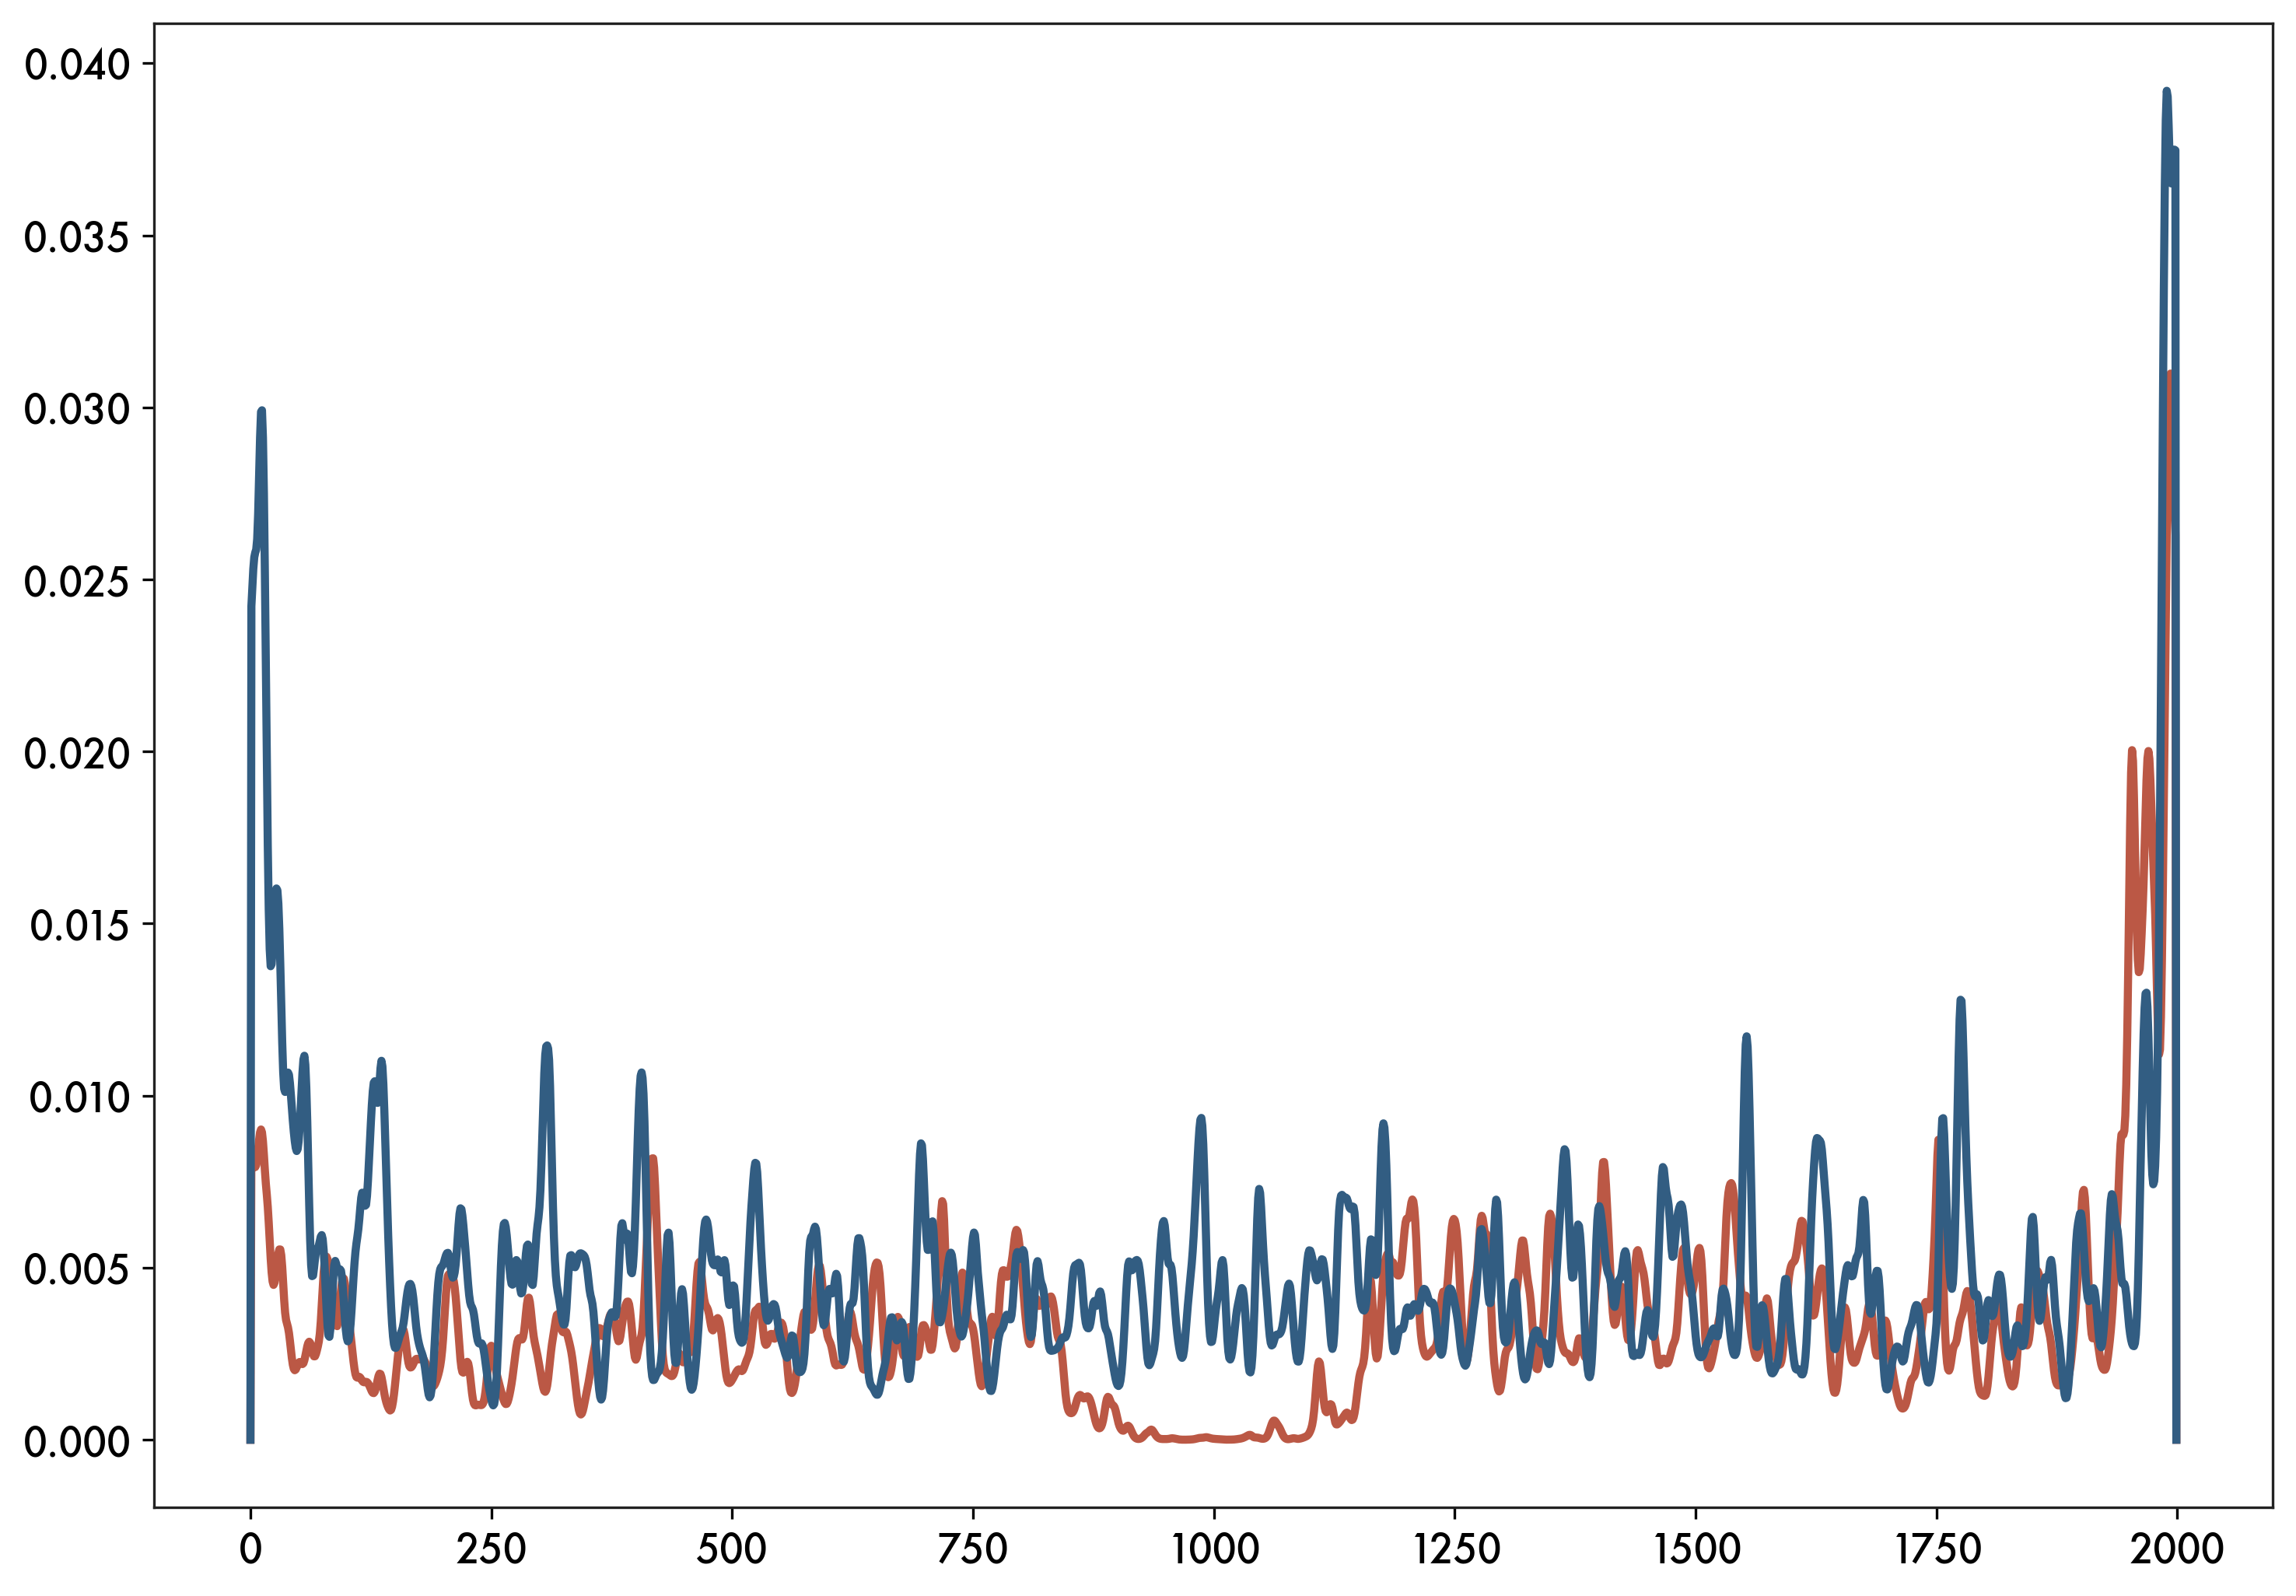

In [42]:
plt.plot(pcp_grad.ACCPR)
plt.plot(pcp_nograd.ACCPR)

# Check PBC

In [ ]:
nograd = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land.nograd/a-L-2019-09-16-000000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','PCPRR','SFLUX_T','CCCNP']]

In [ ]:
grad = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-000000-g1.h5',
                        engine = 'h5netcdf', phony_dims='access')[['ACCPR','PCPRR','SFLUX_T','CCCNP']]

In [ ]:
print(grad.mean())
print()
print(nograd.mean())

In [ ]:
print(grad.ACCPR.sum())
print(nograd.ACCPR.sum())

In [ ]:
100*(66130-59956)/59956

In [ ]:
var = 'CCCNP'

nograd = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land.nograd/a-L-2019-09-16-000000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','PCPRR','SFLUX_T','CCCNP']]

grad = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-000000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','PCPRR','SFLUX_T','CCCNP']]

plt.plot(grad.sel(phony_dim_2=1).mean(dim='phony_dim_0')[var])
plt.plot(nograd.sel(phony_dim_2=1).mean(dim='phony_dim_0')[var])

nograd = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land.nograd/a-L-2019-09-16-060000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','PCPRR','SFLUX_T','CCCNP']]

grad = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land/a-L-2019-09-16-060000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','PCPRR','SFLUX_T','CCCNP']]

plt.plot(grad.sel(phony_dim_2=1).mean(dim='phony_dim_0')[var])
plt.plot(nograd.sel(phony_dim_2=1).mean(dim='phony_dim_0')[var])

In [ ]:
var = 'ACCPR'

grad = xr.open_dataset('/camp2e/gleung/aerograd/grad-open/a-L-2019-09-16-173000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR']]

nograd = xr.open_dataset('/camp2e/gleung/aerograd/nograd-open/a-L-2019-09-16-173000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR']]

plt.plot(grad.sel(phony_dim_2=1).mean(dim='phony_dim_1')[var])
plt.plot(nograd.sel(phony_dim_2=1).mean(dim='phony_dim_1')[var])

In [ ]:
plt.plot(grad.ACCPR.sum(dim='phony_dim_1'))
plt.plot(nograd.ACCPR.sum(dim='phony_dim_1'))


In [16]:
x = (pd.read_pickle(f"{anaPath}emit.sulf.land.grad/mean_surf_flux/ACCPR.pkl").reset_index())#.groupby('time').AODT.mean()
y = (pd.read_pickle(f"{anaPath}emit.sulf.land.nograd/mean_surf_flux/ACCPR.pkl").reset_index())#.groupby('time').AODT.mean()


In [56]:
nograd = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land.nograd/a-L-2019-09-16-080000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','CCCNP']]

grad = xr.open_dataset('/camp2e/gleung/aerograd/emit.sulf.land.grad/a-L-2019-09-16-080000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','CCCNP']]

In [57]:
pcp_grad = grad.ACCPR.mean(dim='phony_dim_1')
pcp_nograd = nograd.ACCPR.mean(dim='phony_dim_1')

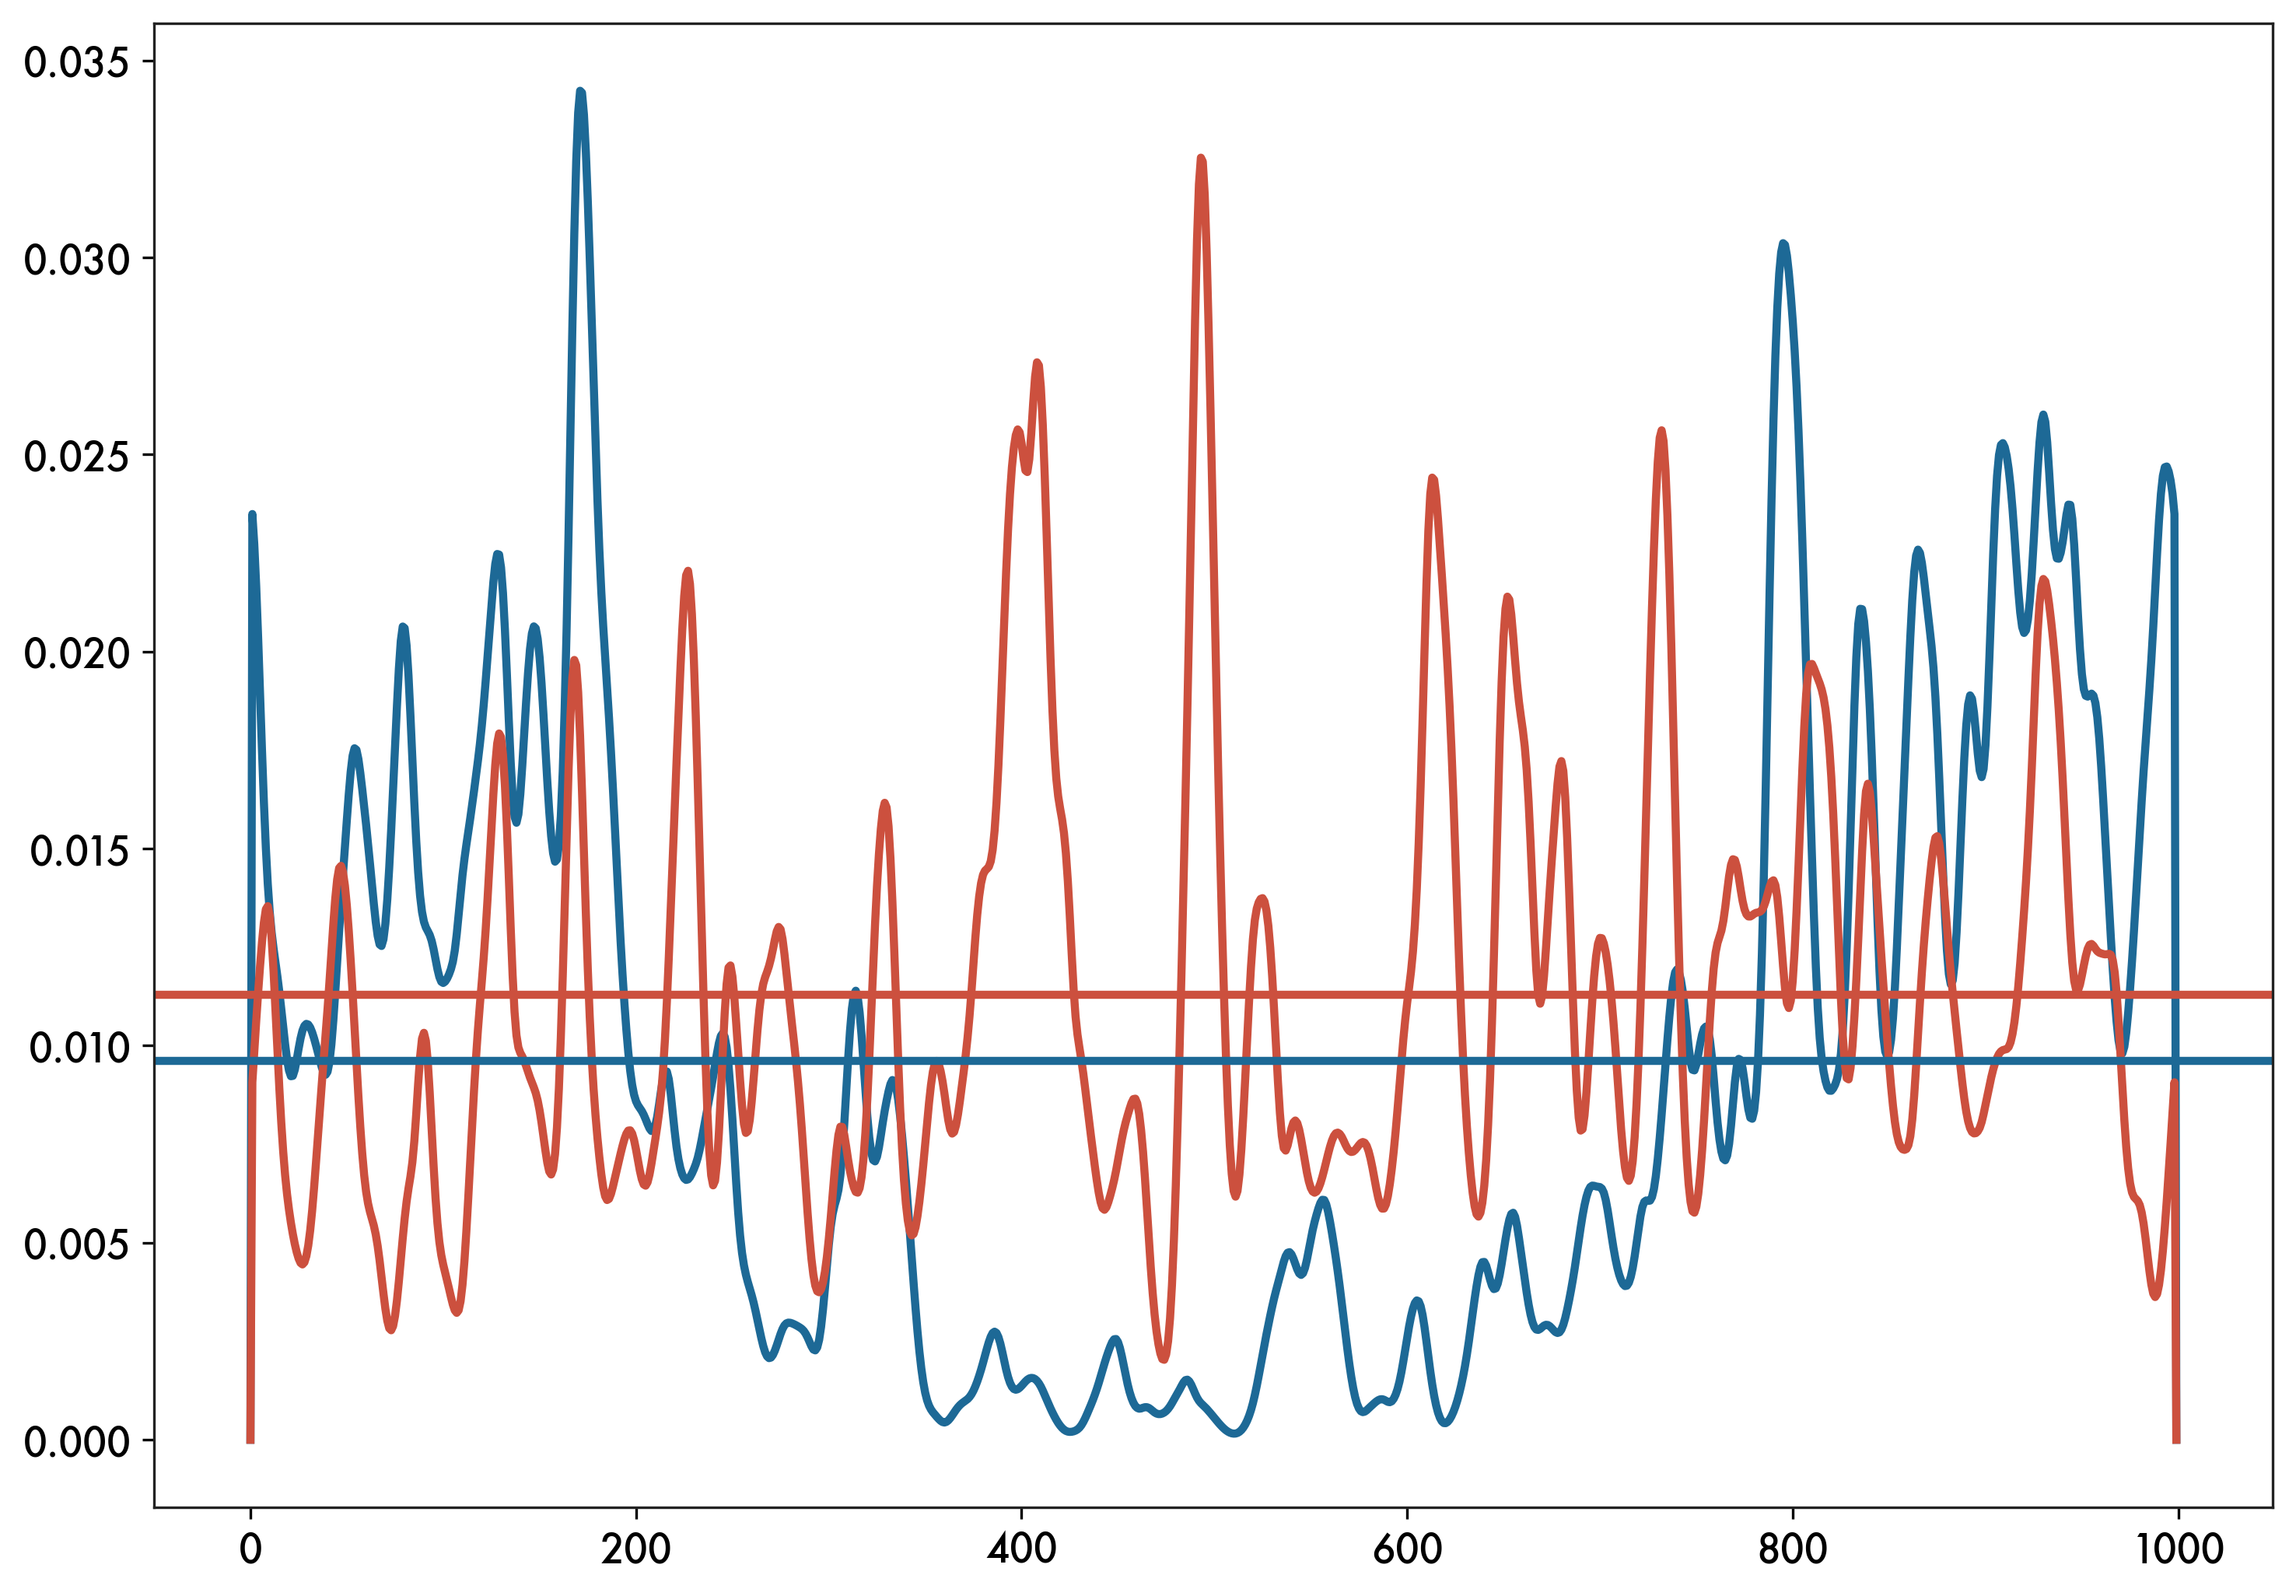

In [58]:
plt.plot(pcp_grad,color=blue)
#plt.plot(pcp_grad_,color=green)
plt.plot(pcp_nograd,color=red)
plt.axhline(pcp_grad.mean(),color=blue)
#plt.axhline(pcp_grad_.mean(),color=green)
plt.axhline(pcp_nograd.mean(),color=red)
#print(pcp_grad.mean())
#print(pcp_nograd.mean())

In [85]:
grad = xr.open_dataset('/camp2e/gleung/aerograd/PBC.emit-all.grad/a-L-2019-09-16-120000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','CCCNP']]
nograd = xr.open_dataset('/camp2e/gleung/aerograd/PBC.emit-all.nograd/a-L-2019-09-16-120000-g1.h5',
                        engine = 'h5netcdf',phony_dims='access')[['ACCPR','CCCNP']]

In [86]:
pcp_grad = grad.ACCPR.mean(dim='phony_dim_0')
pcp_nograd = nograd.ACCPR.mean(dim='phony_dim_0')

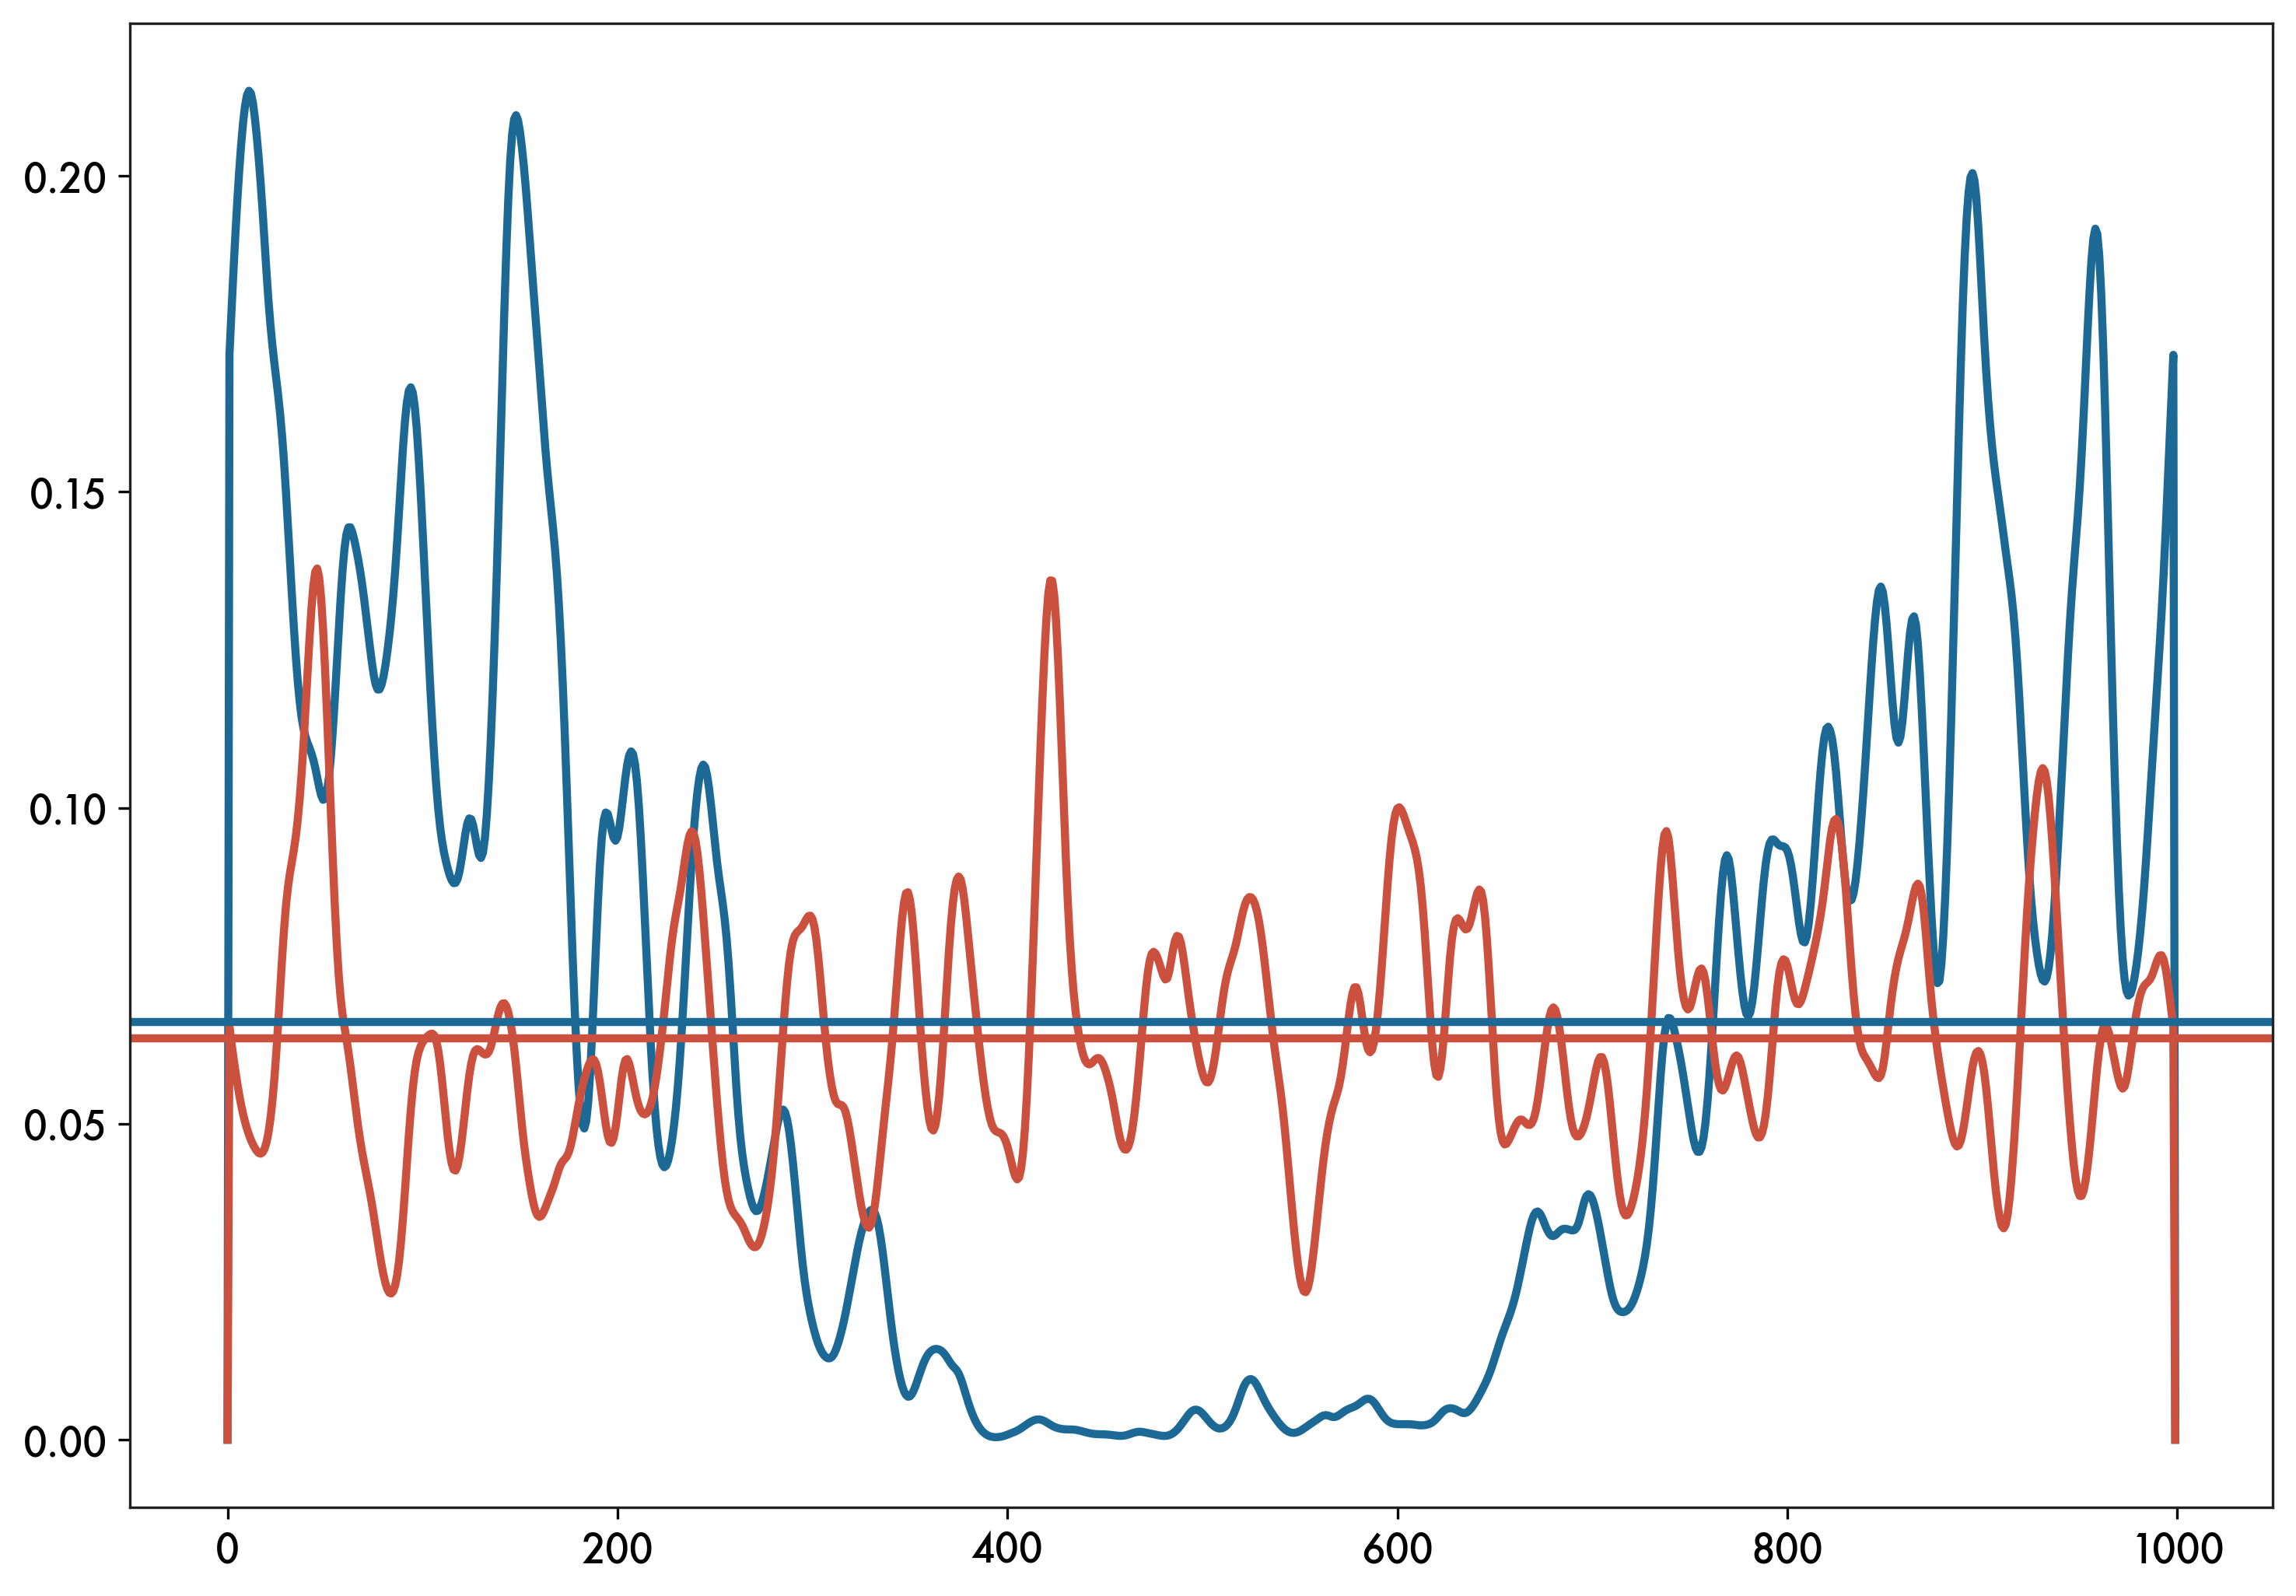

In [87]:
plt.plot(pcp_grad,color=blue)
plt.plot(pcp_nograd,color=red)

plt.axhline(pcp_grad.mean(),color=blue)
plt.axhline(pcp_nograd.mean(),color=red)

In [90]:
ccn_grad = grad.CCCNP.sel(phony_dim_2=1).mean(dim='phony_dim_0')
ccn_nograd = nograd.CCCNP.sel(phony_dim_2=1).mean(dim='phony_dim_0')

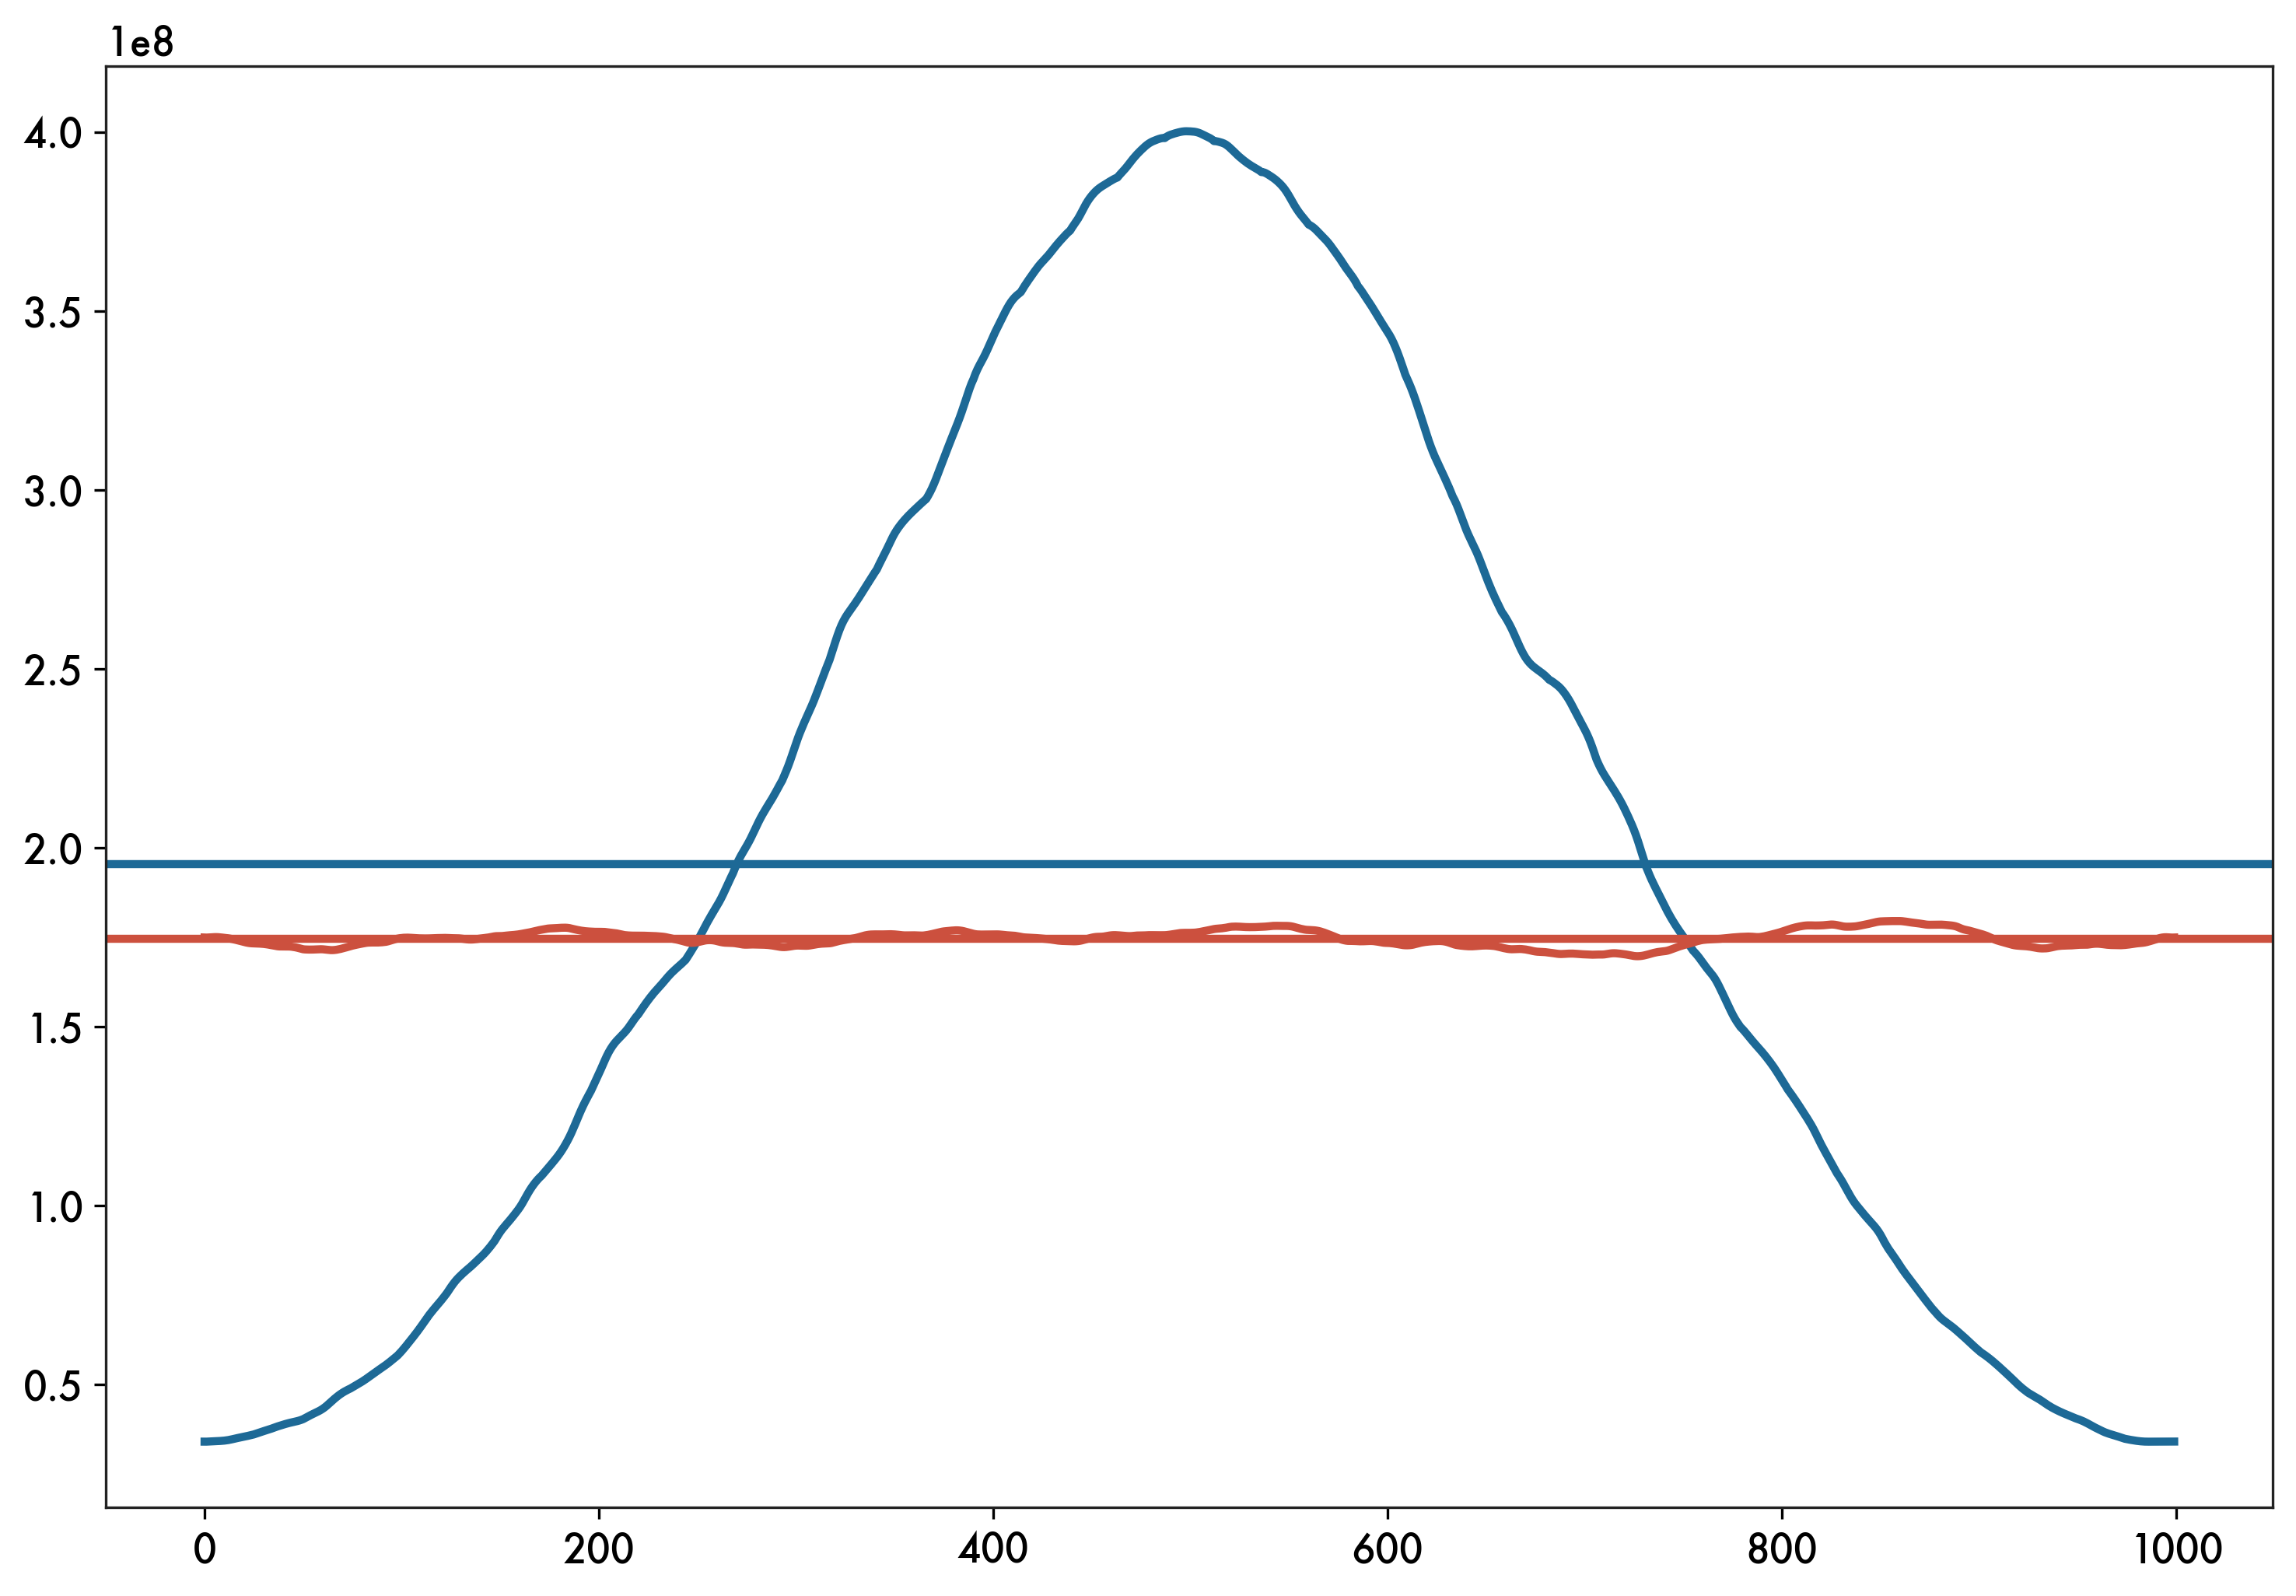

In [91]:
plt.plot(ccn_grad,color=blue)
plt.plot(ccn_nograd,color=red)
plt.axhline(ccn_grad.mean(),color=blue)
plt.axhline(ccn_nograd.mean(),color=red)

In [48]:
ccnprof_grad = grad.CCCNP.sel(phony_dim_0=500).mean(dim='phony_dim_1')
ccnprof_grad_low = grad.CCCNP.sel(phony_dim_0=0).mean(dim='phony_dim_1')
ccnprof_nograd = nograd.CCCNP.sel(phony_dim_0=500).mean(dim='phony_dim_1')

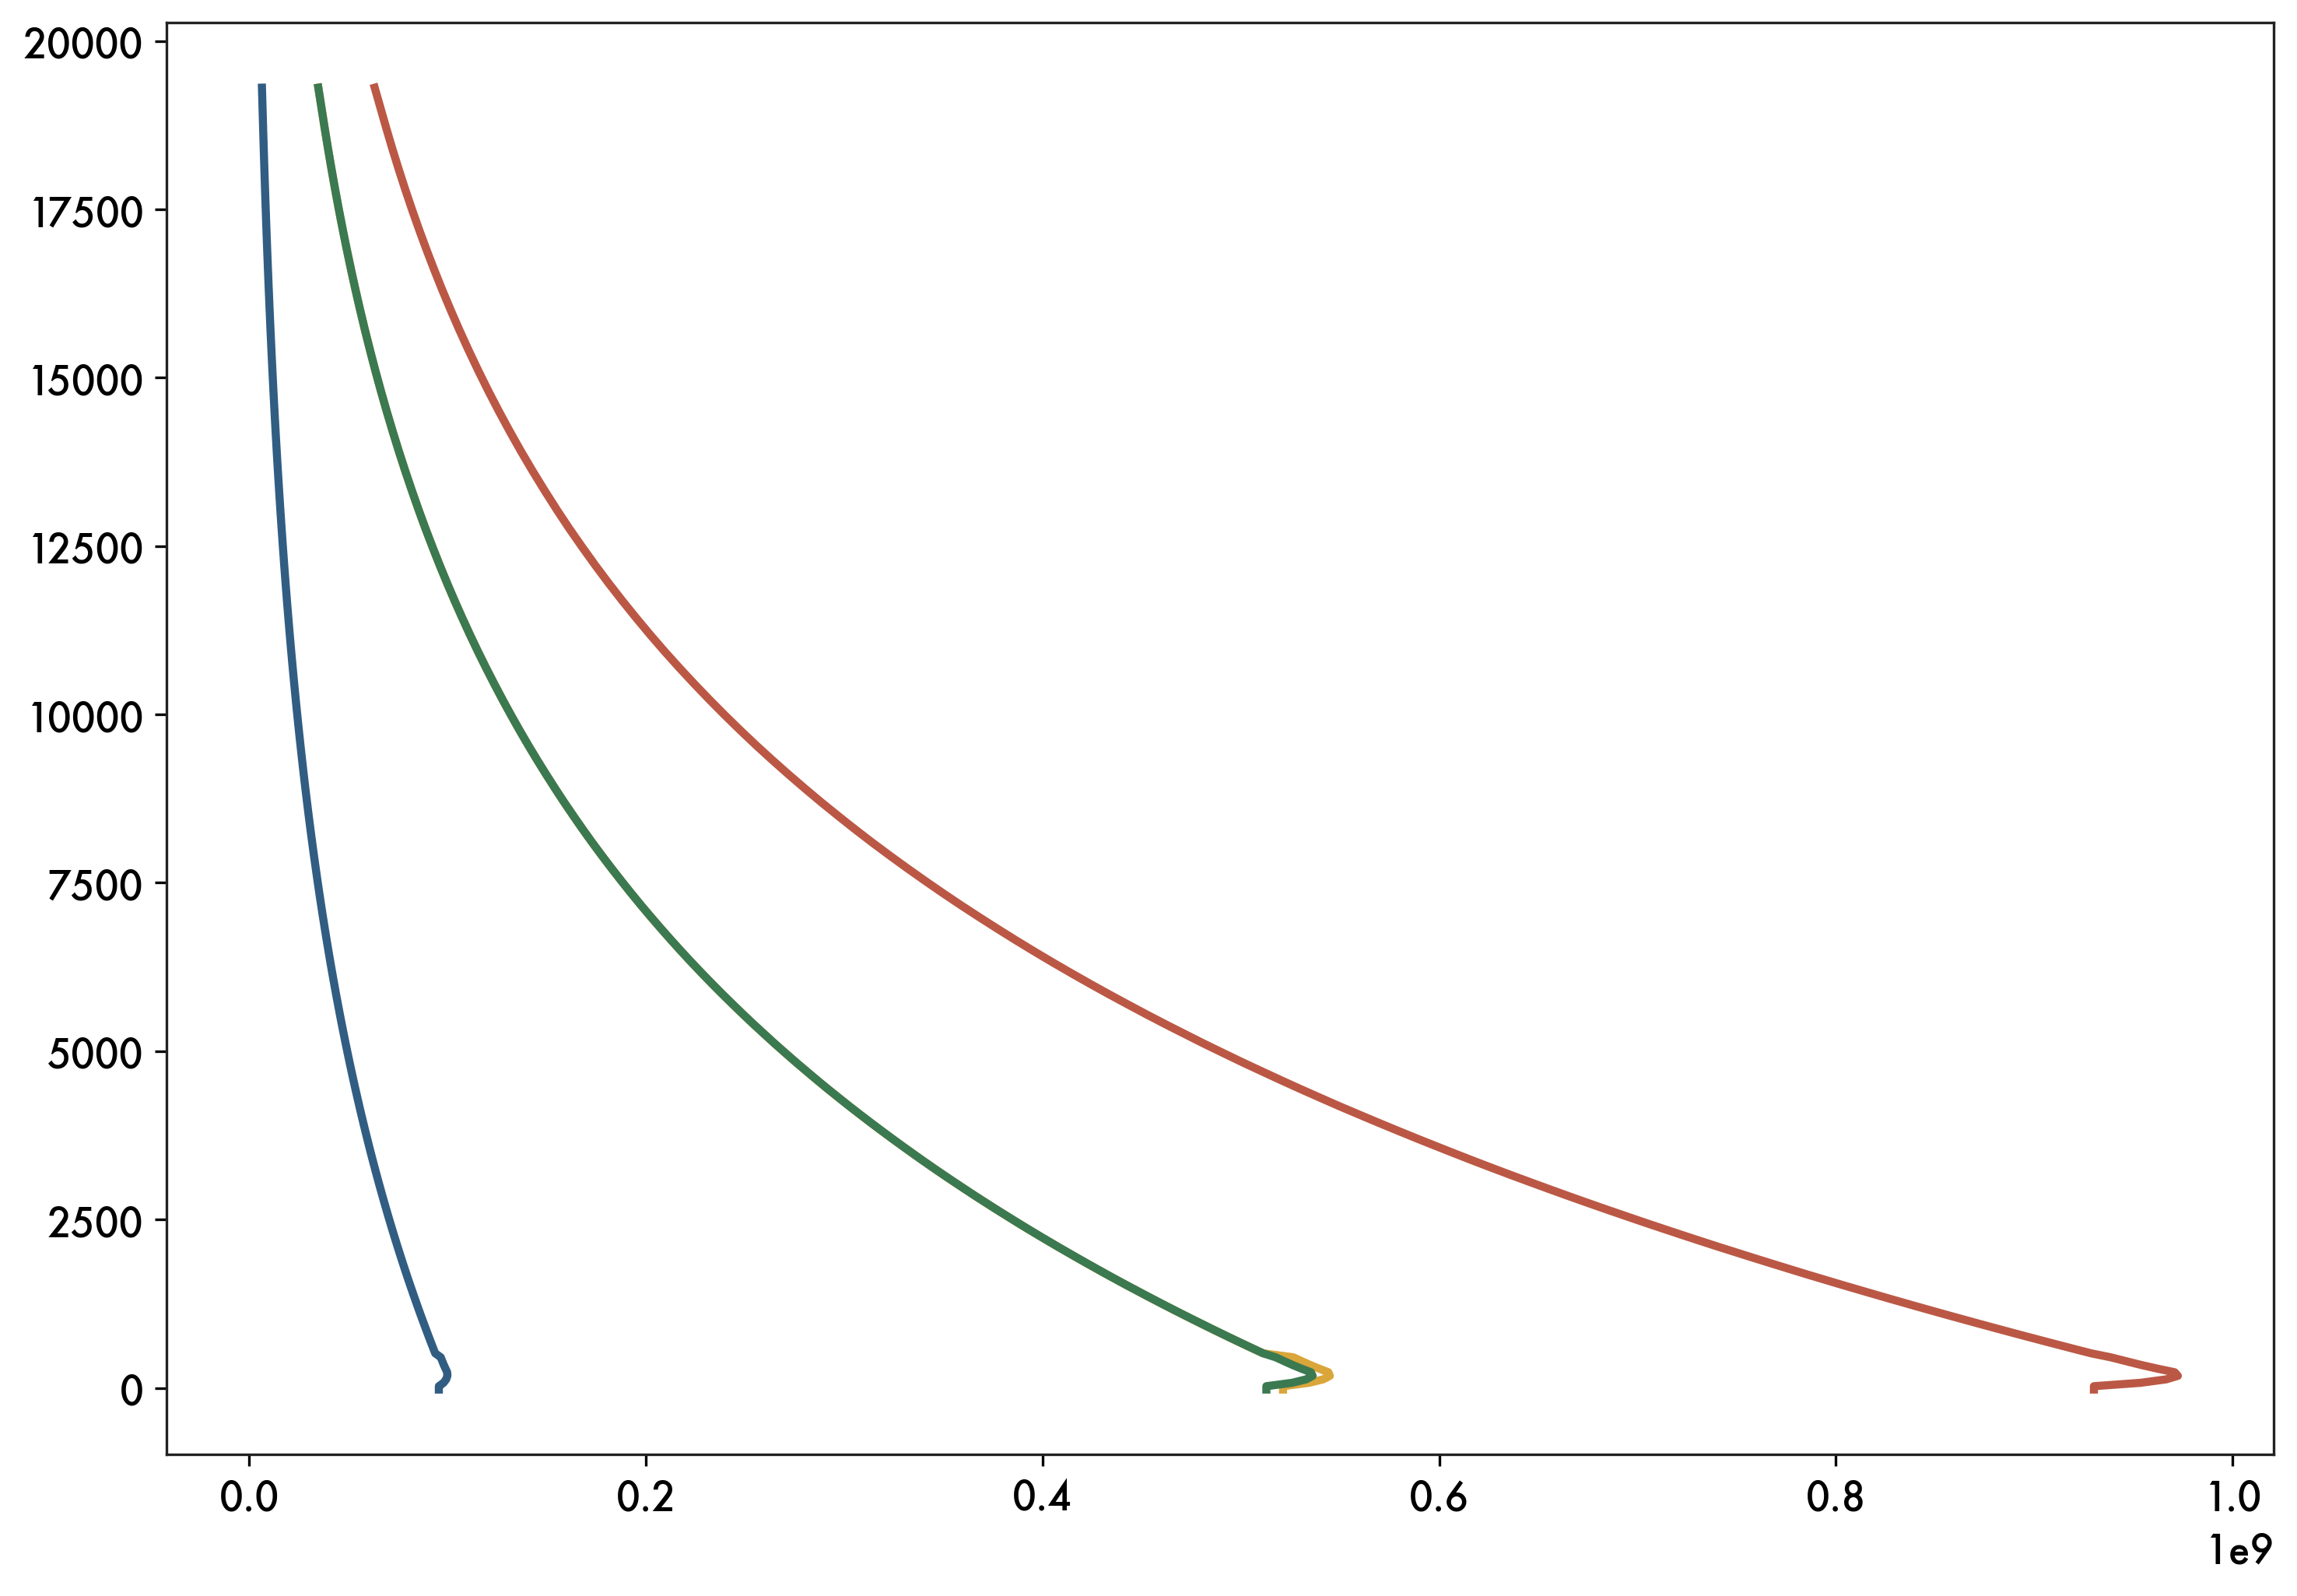

In [49]:
plt.plot(ccnprof_grad,alt)
plt.plot(ccnprof_grad_low,alt)
plt.plot(ccnprof_nograd,alt)
plt.plot((ccnprof_grad+ccnprof_grad_low)/2,alt)

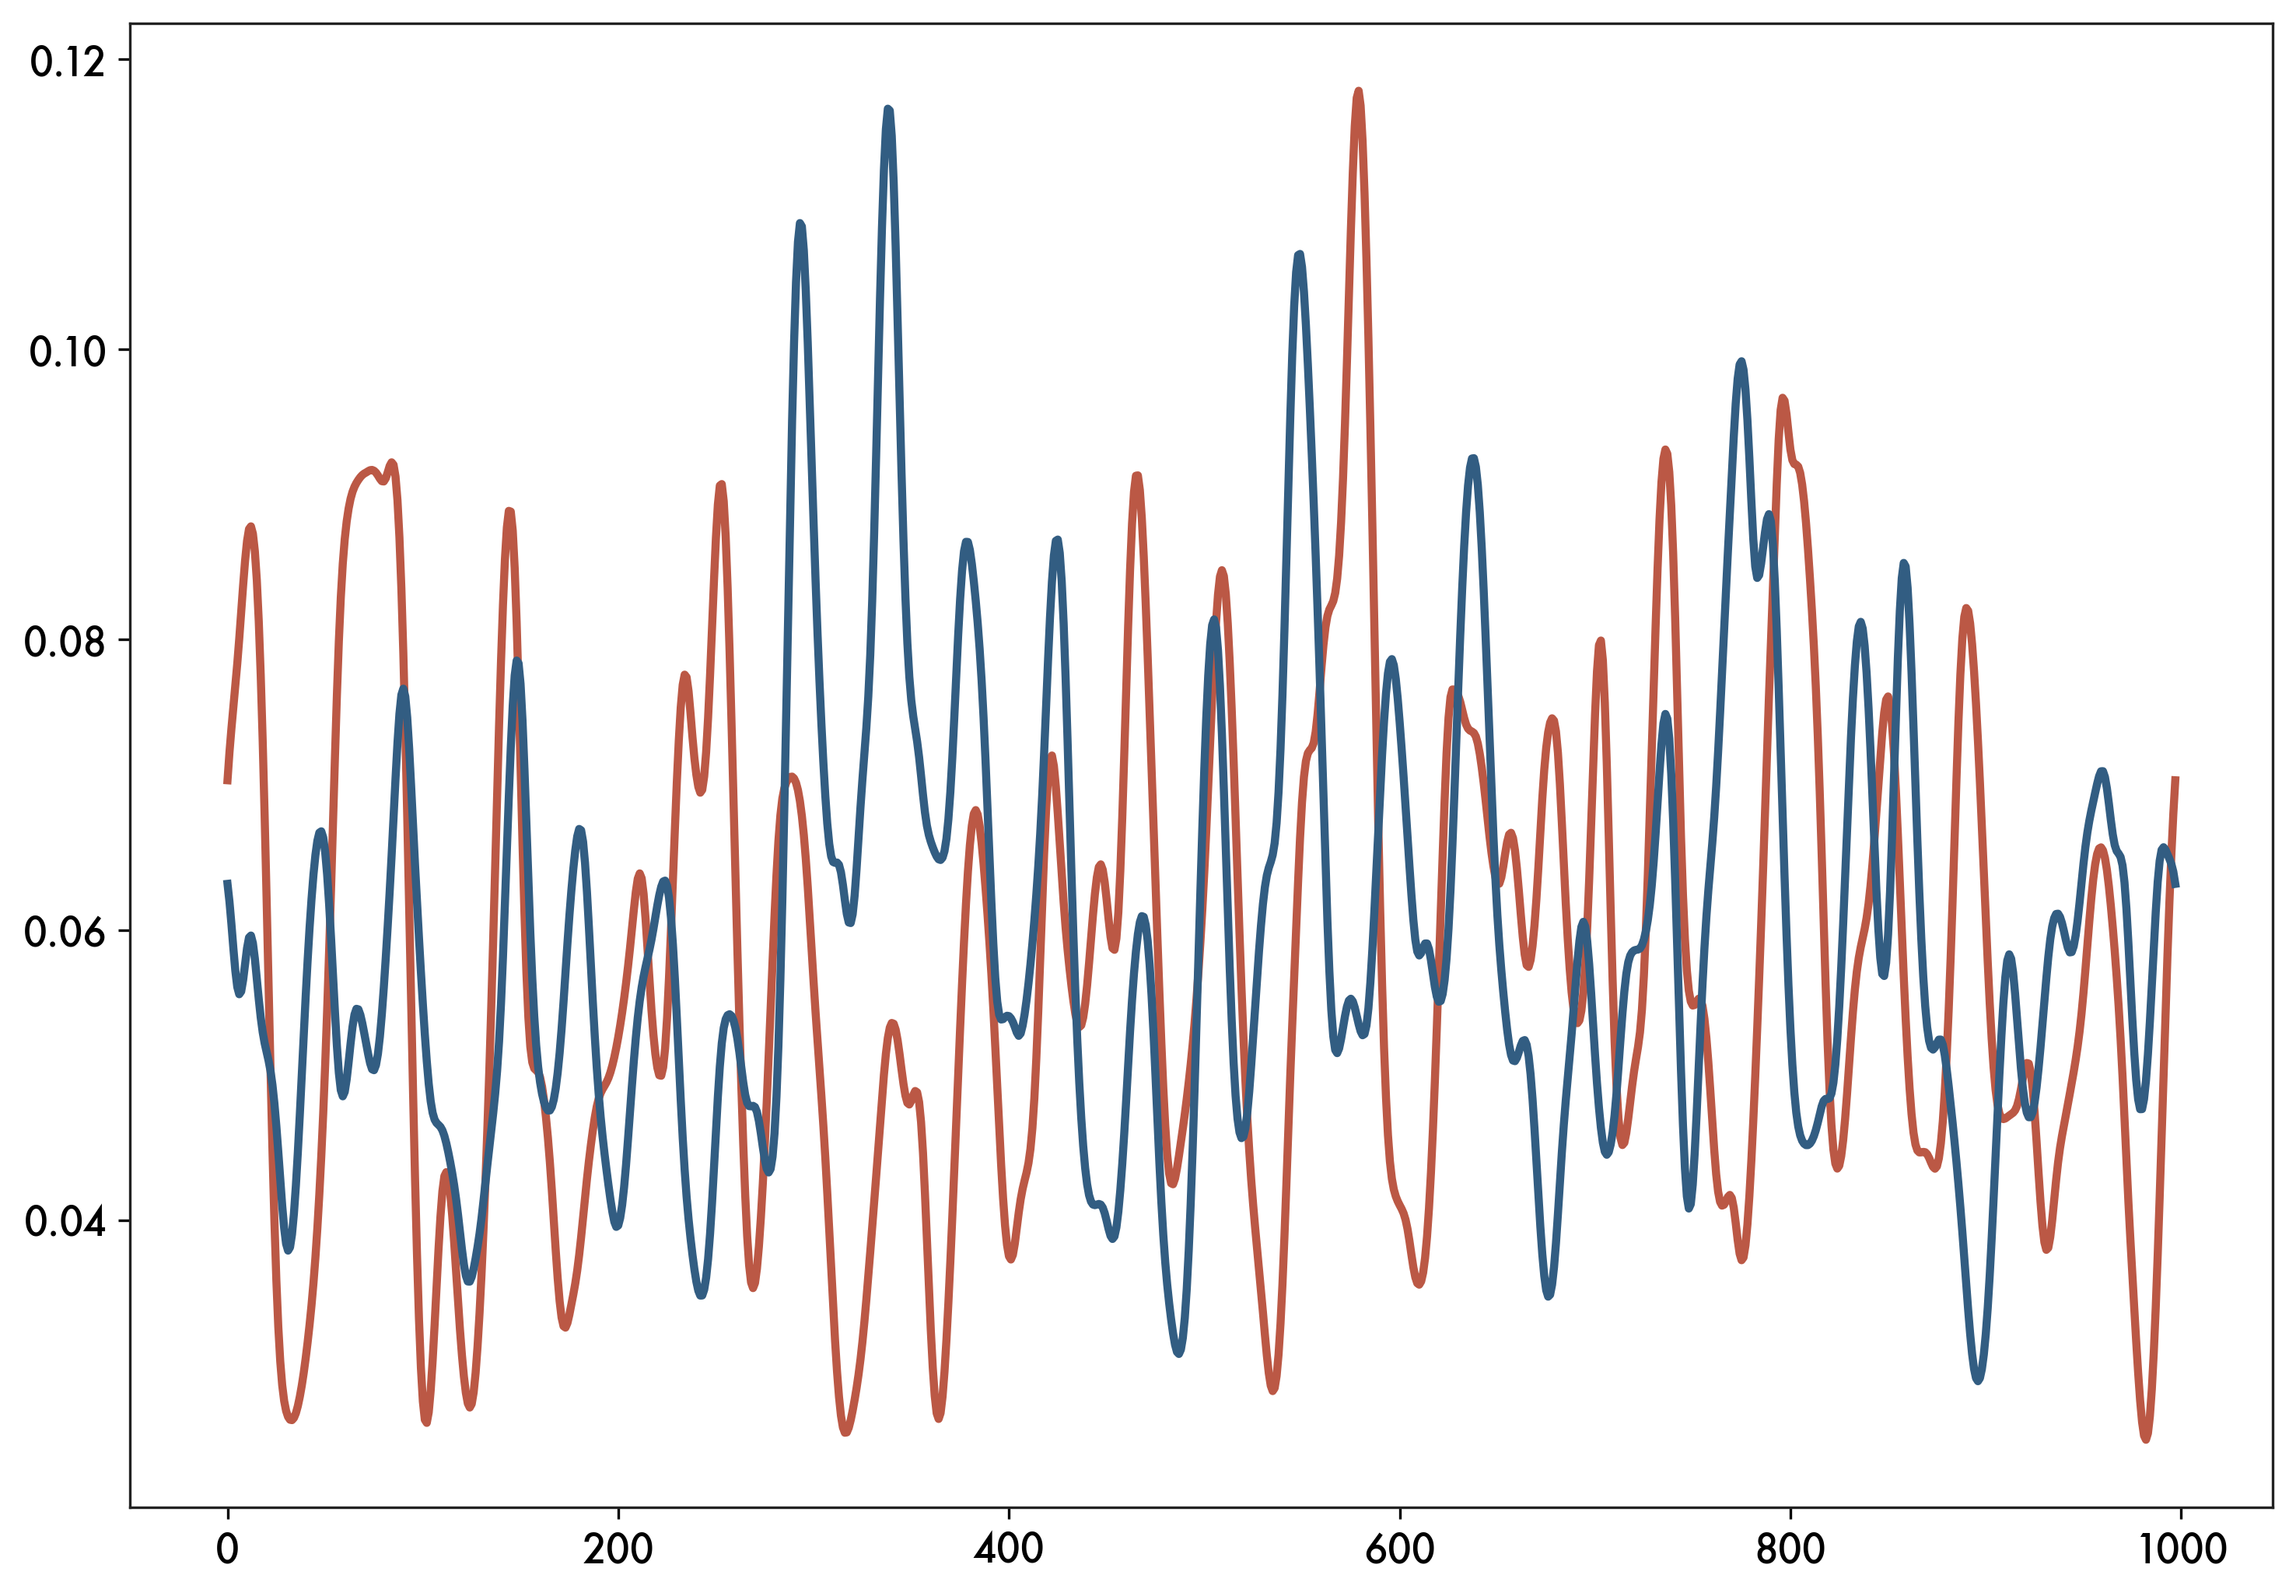

In [18]:
h = 144

plt.plot(x[x.time==h].x,x[x.time==h].ACCPR)
plt.plot(y[y.time==h].x, y[y.time==h].ACCPR)